# Исследование оттока клиентов банка

## Вступление к проекту

### Описание проблемы

**Заказчик исследования**: отдел маркетинга “Метанпромбанка”.

**Цель исследования**: в банке повысился отток клиентов, и с этим нужно что-то делать.

**Ретроспектива**: ранее было проведено исследование оттока клиентов, составлены дэшборды и выделены сегменты, но клиентская база поменялась, и текущие решения не работают.

**Ожидаемый результат**: выделены отточные сегменты, даны рекомендации по его снижению.

**Задачи исследования**:

Я анализирую клиентов банка и выделяю сегменты клиентов, которые склонны уходить из банка. Для этого:
- Провожу исследовательский анализ данных, определяю все значимые признаки оттока: нахожу интервалы значений характеристик, которые связаны с повышенным оттоком, и сравниваю портреты типичных клиентов, склонных и не склонных уходить из банка.
- Формулирую и проверяю статистические гипотезы:
- Проверяю гипотезу различия дохода между клиентами, которые ушли, и теми, которые остались.
- Формулирую и проверяю дополнительную статистическую гипотезу относительно представленных данных, которая помогает внести ясность в исследование.
- Объединяю признаки оттока, формирую сегменты клиентов, отбираю лучшие из них и даю по ним рекомендации.

### Описание данных

Датасет содержит данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Переменные:
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.

### План исследования

1. Загрузка данных и их описание;
2. Подготовка данных к исследованию:
    - обработка аномальных значений;
    - анализ природы пропусков;
    - обработка дубликатов;
3. Исследовательский анализ данных:
    - Анализ распределения признаков отточных клиентов;
    - Анализа портрета клиента;
    - Корреляционный анализ;
4. Проверка гипотез;
5. Сегментация отточных клиентов;
6. Результаты исследования.

## Исследование

In [1]:
# Устанавливаем модули

# !pip install phik

In [2]:
# Импортируем библиотеки

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

import numpy as np
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

import phik
from phik.report import plot_correlation_matrix

In [3]:
# Устанавливаем размер графика по умолчанию для всех новых графиков

plt.rcParams['figure.figsize'] = (20, 15)

# Устанавливаем размер шрифта для всех элементов: заголовков, подписей осей, меток на осях и легенды

plt.rcParams.update({'font.size': 18,
                     'axes.labelsize': 20,
                     'axes.titlesize': 30,
                     'xtick.labelsize': 16,
                     'ytick.labelsize': 16,
                     'legend.fontsize': 18})

### Загрузка данных и их описание

In [4]:
# Загружаем данные в pandas

data = pd.read_csv('bank_scrooge.csv')

In [5]:
# Выводим данные на экран

data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


В исходных данных 10000 наблюдений и 12 переменных. Обнаружены пропуски в переменной `balance`.

Будет хорошей практикой приведение названий переменных в соответствие с PEP 8.

---

In [6]:
# Переименовываем столбцы в соответствии с PEP 8

renamed_columns = {'USERID': 'user_id',
                   'EST_SALARY': 'est_salary'}

data.rename(columns=renamed_columns, inplace=True)

In [7]:
# Выводим общую информацию о данных на экран

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Помимо `balance` пропуски в данных обнаружены в переменной `age`.

Тип данных требует уточнения для переменных `score` и `age` (выдвигаем гипотезу о том, что в переменных есть только целые числа), а также для переменных `city` и `gender` (выдвигаем гипотезу о том, что эти категориальные переменные должны быть закодированы для статичестического анализа).

---

In [8]:
# Посчитаем количество уникальных значений и пропусков по столбцам, чтобы лучше понять структуру данных

pd.DataFrame({'unique_values': data.nunique(),
              'missing_values': data.isna().sum(),
              'missing_values_%': (data.isna().sum() / len(data) * 100).round(2)})

,unique_values,missing_values,missing_values_%
user_id,9927,0,0.00
score,348,0,0.00
city,3,0,0.00
gender,2,0,0.00
age,68,26,0.26
equity,10,0,0.00
balance,7701,2295,22.95
products,6,0,0.00
credit_card,2,0,0.00
last_activity,2,0,0.00


In [9]:
# Выведем уникальные значения категориальных переменных

for col in ['city',
            'gender',
            'equity',
            'products',
            'credit_card',
            'last_activity',
            'churn']:
    print(col, sorted(data[col].unique()))

city ['Ростов', 'Рыбинск', 'Ярославль']
gender ['Ж', 'М']
equity [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
products [0, 1, 2, 3, 4, 5]
credit_card [0, 1]
last_activity [0, 1]
churn [0, 1]


Данные соответствуют описанию: 3 города, два пола, количество единиц собственности от 0 до 9 без пропусков, количество банковских продуктов от 0 до 5 без пропусков (отсутствие продуктов может быть аномалий, это нужно проверить), индикатор наличия кредитной карты, индикатор последней активности клиента, индикатор оттока клиента.

---

**Промежуточные выводы**

Были замечены пропуски данных в переменных в `age` и `balance`. Были замечены дубликаты данных в переменной `user_id`. Остальные данные соответствуют описанию.

In [10]:
# Выведем на экран описательные статистики

display(data.describe())
data.describe(include='object')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


,city,gender
count,10000,10000
unique,3,2
top,Ярославль,М
freq,5888,5005


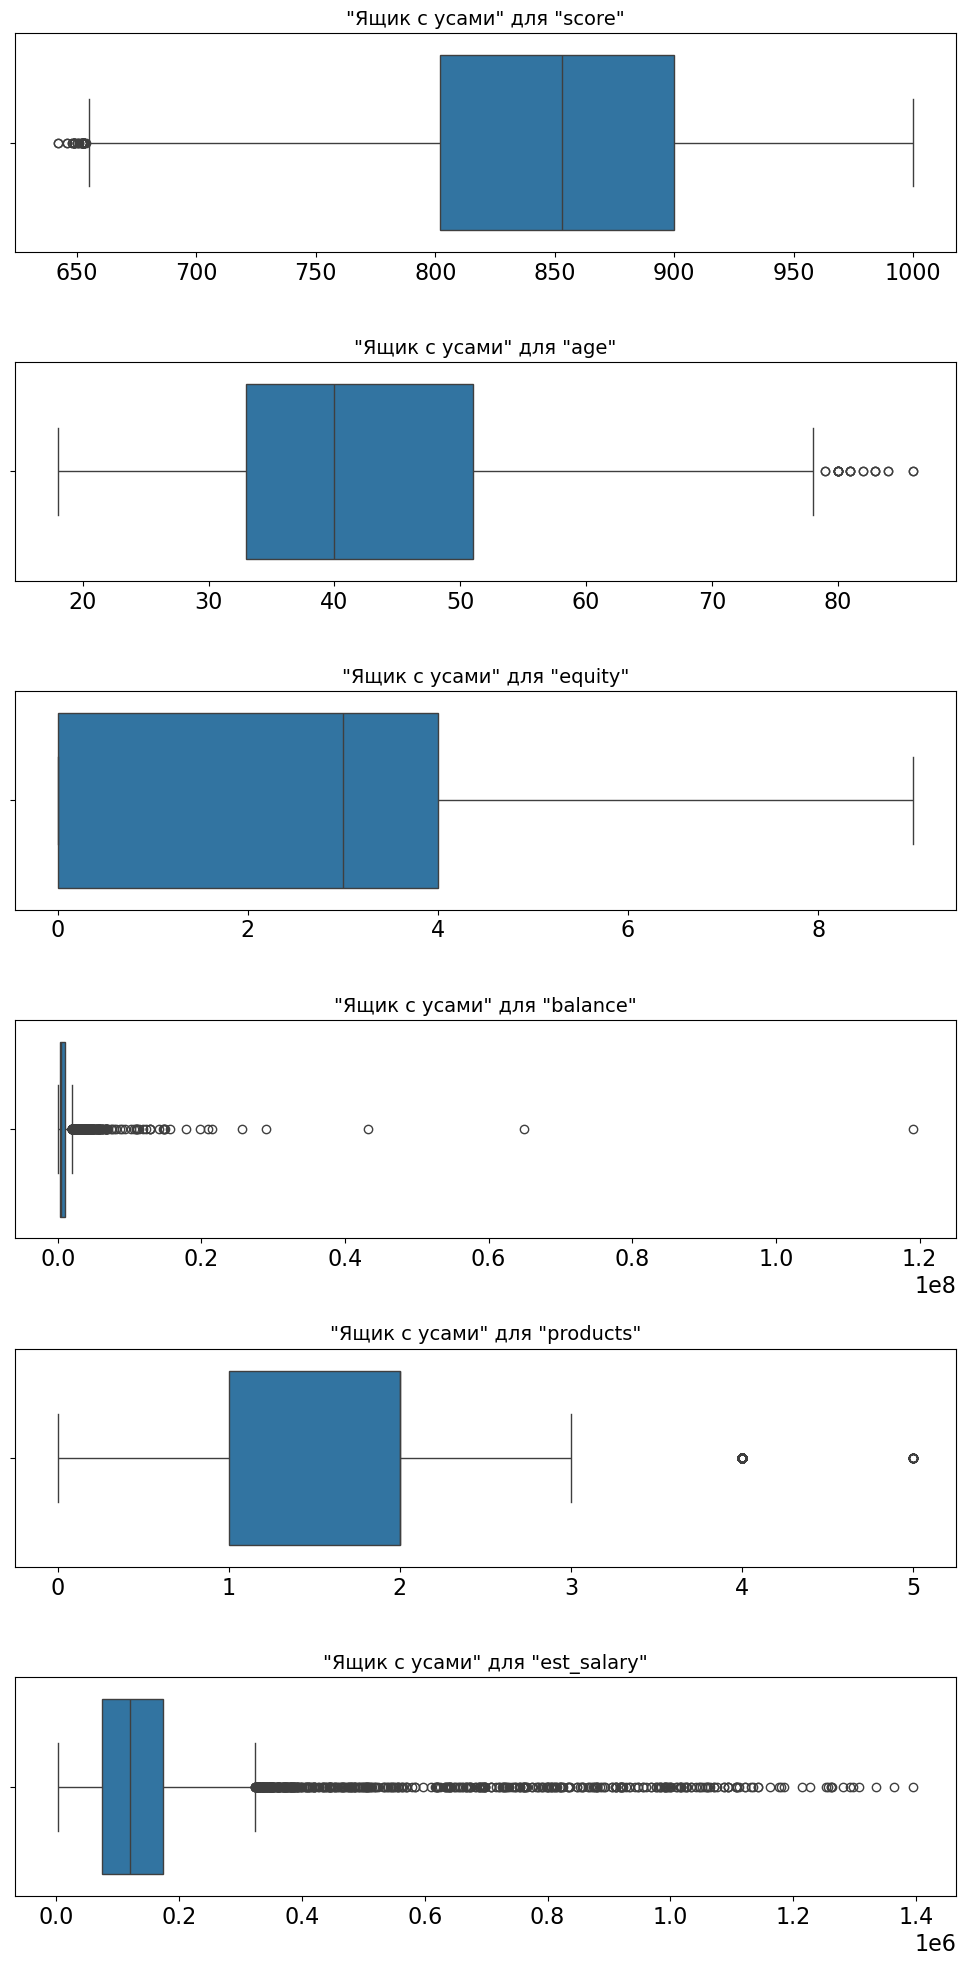

In [11]:
# Создадим список переменных, для которых мы хотим создать "ящики с усами"

numerical_columns = ['score',
                     'age',
                     'equity',
                     'balance',
                     'products',
                     'est_salary']

# Создадим фигуру и массив осей, одна ось для каждой переменной

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 20))

# Создадим "ящик с усами" для каждой переменной

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=col,
                data=data,
                ax=axes[i])
    axes[i].set_title(f'"Ящик с усами" для "{col}"', fontsize=14)
    axes[i].set_xlabel('')

plt.tight_layout()

Были замечены аномальные значения в `balance`. Отметим, что выбросы однозначно присутствуют в переменных `balance` и `est_salary`. Выбросы в остальных переменных не являются явной проблемой.

---

In [12]:
print('Средний балл кредитного скоринга клиента:', int(data['score'].mean()), 'баллов.')
print()
print('Мода города клиента: Ярославль (58.88%).')
print()
print('Мода пола клиента: М (50.05%).')
print()
print('Средний возраст клиента:', int(data['age'].mean()), 'года.')
print()
print('Мода количества собственности клиента:', int(data['equity'].mode().iloc[0]), 'ед.')
print()
print('Медианный баланс клиента:', int(data['balance'].median()),'₽.')
print()
print('Мода количества банковских продуктов клиента:', int(data['products'].mode().iloc[0]), 'ед.')
print()
print('Медианная зарплата клиента:', int(data['est_salary'].median()),'₽.')

Средний балл кредитного скоринга клиента: 848 баллов.

Мода города клиента: Ярославль (58.88%).

Мода пола клиента: М (50.05%).

Средний возраст клиента: 42 года.

Мода количества собственности клиента: 0 ед.

Медианный баланс клиента: 524272 ₽.

Мода количества банковских продуктов клиента: 2 ед.

Медианная зарплата клиента: 119658 ₽.


**Промежуточные выводы**

Типичный клиент банка — это мужчина из Ярославля 42 лет. У него 848 баллов кредитного скоринга, есть 2 банковских продукта, в т. ч. кредитная карта. У него нет собственности, на счету он хранит 524272 ₽, а зарабатывает 119658 ₽.

#### Выводы по загрузке данных и их описанию

- В исходных данных 10000 наблюдений и 12 переменных.
- Были замечены пропуски данных в переменных в `age` и `balance`. Были замечены дубликаты данных в переменной `user_id`.
- Данные соответствуют описанию: 3 города, два пола, количество единиц собственности от 0 до 9 без пропусков, количество банковских продуктов от 0 до 5 без пропусков (отсутствие продуктов может быть аномалий, это нужно проверить), индикатор наличия кредитной карты, индикатор последней активности клиента, индикатор оттока клиента.
- Типичный клиент банка — это мужчина из Ярославля 42 лет. У него 848 баллов кредитного скоринга, есть 2 банковских продукта, в т. ч. кредитная карта. У него нет собственности, на счету он хранит 524272 ₽, а зарабатывает 119658 ₽.

### Подготовка данных к исследованию

In [13]:
# Изменим тип данных для `score`

data['score'] = data['score'].astype('int64')

#### Обработка аномальных значений в данных

In [14]:
# Выведем на экран список клиентов в балансом более 10 млн рублей

data[data['balance'] > 10000000].sort_values('balance', ascending=False)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7597,156149,900,Ярославль,М,62.0,5,1.191136e+08,2,1,1,138041.31,0
1059,114103,894,Ярославль,М,58.0,4,6.486621e+07,2,1,1,88861.60,1
1846,114088,927,Ярославль,М,57.0,5,4.327710e+07,3,0,1,82619.00,0
4721,228786,1000,Ярославль,М,45.0,5,2.900893e+07,2,0,1,811804.54,0
9753,122015,885,Ярославль,М,64.0,4,2.572776e+07,3,1,0,168746.90,0
8484,221720,1000,Ярославль,Ж,35.0,5,2.154994e+07,2,0,0,1051902.65,0
6948,137434,1000,Ярославль,М,37.0,4,2.090616e+07,2,1,1,947606.60,1
125,227092,1000,Ярославль,М,32.0,5,1.975718e+07,2,1,1,1024626.50,0
7109,203824,986,Ярославль,М,34.0,5,1.790476e+07,2,1,1,856500.86,1
4005,163640,912,Ярославль,М,35.0,4,1.562410e+07,2,0,1,1395064.45,0


Клиенты, у которых на счету есть больше 10 млн рублей, смещают оценки вправо, однако, поскольку среди таких клиентов есть те, кто перестал быть клиентами, мы не можем отбросить такие наблюдения, потому что они могут быть отдельным сегментом.

In [15]:
# Выведем на экран список клиентов с нулевым количеством продуктов

data[data['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Есть лишь одно наблюдение с количеством продуктов, равным 0 — оно связано с неактивной пожилой женщиной. Такое наблюдение стоит удалить.

In [16]:
# Удаляем аномальное наблюдение

data = data[data['products'] > 0]

**Промежуточные выводы**

Было удалено аномальное значение в `products`.

#### Обработка пропусков в данных

In [17]:
# Выведем на экран все пропуски в переменной `age`

data[data['age'].isna()].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8785,127440,663,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
9819,140934,832,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9457,141945,929,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
5495,151662,884,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
9667,163657,849,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0
9632,185829,927,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0
9380,187459,894,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0


В переменной `age` пропущено менее 1% наблюдений, что даёт нам право удалить пропущенные значения. Перед этим мы можем проверить, нет ли логики в том, какие значения пропущены, и как пропуски зависят от распределения значений в других переменных.

---

In [18]:
# Сруппируем данные по индикатору пропусков для колонки `age` и вычислим статистики

grouped_data_age = (data.assign(missing_age=data['age'].isnull().astype(int))
                        .groupby('missing_age')
                        .agg({'est_salary': ['mean'],
                              'age': ['mean'],
                              'balance': ['mean'],
                              'products': ['median'],
                              'equity': ['median'],
                              'city': lambda x: x.mode()[0],
                              'gender': lambda x: x.mode()[0]})
                        .reset_index())

# Переименуем столбцы для удобства

grouped_data_age.columns = ['missing_age',
                            'mean_salary',
                            'mean_age',
                            'mean_balance',
                            'median_products',
                            'median_equity',
                            'mode_city',
                            'mode_gender']

# Рассчитаем относительные разницы для числовых переменных
relative_difference_age = (
    grouped_data_age.loc[1, ['mean_salary', 'mean_age', 'mean_balance', 'median_products', 'median_equity']] /
    grouped_data_age.loc[0, ['mean_salary', 'mean_age', 'mean_balance', 'median_products', 'median_equity']] - 1
) * 100

# Добавим NaN для категориальных переменных
relative_difference_age = pd.concat([
    relative_difference_age,
    pd.Series(['NaN', 'NaN'], index=['mode_city', 'mode_gender'])  # Добавляем NaN для категориальных переменных
])

# Сформируем итоговую таблицу
final_table_age = pd.DataFrame({
    'Показатель': ['Средняя зарплата',
                   'Средний возраст',
                   'Средний баланс',
                   'Медианное количество продуктов',
                   'Медианное количество собственности',
                   'Мода по городу',
                   'Мода по полу'],
    'Значение не пропущено': grouped_data_age.loc[0, [
        'mean_salary', 'mean_age', 'mean_balance', 'median_products', 'median_equity', 'mode_city', 'mode_gender'
    ]].values,
    'Значение пропущено': grouped_data_age.loc[1, [
        'mean_salary', 'mean_age', 'mean_balance', 'median_products', 'median_equity', 'mode_city', 'mode_gender'
    ]].values,
    'Относительная разница, %': relative_difference_age.values
})

final_table_age

,Показатель,Значение не пропущено,Значение пропущено,"Относительная разница, %"
0,Средняя зарплата,147799.115241,178585.199231,20.829681
1,Средний возраст,42.730773,NaN,NaN
2,Средний баланс,827245.587515,1250033.573,51.107917
3,Медианное количество продуктов,2.0,1.0,-50.0
4,Медианное количество собственности,3.0,0.0,-100.0
5,Мода по городу,Ярославль,Ярославль,NaN
6,Мода по полу,М,М,NaN


Значения в переменной `age` пропущены под влияением других переменных. Например, среди пропущенных значений средняя зарплата выше на 20%, средний баланс выше на 51%, медианное количество продуктов равно 1 вместо 2, а медианное количество собственности — 0 вместо 3. Такие пропуски мы можем классифицировать как **MNAR (Missing Not At Random / Отсутствует не случайно)**. Такие пропуски зависят от данных, и без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т. к. это приведёт к заметным искажениям.

Тем не менее, из-за незначительного количества таких пропусков мы можем их удалить.

In [19]:
# Удалим строки датафрейма с пропущенными значениями в переменной 'age'

data = data.dropna(subset=['age'])

In [20]:
# Выведем на экран все пропуски в переменной `balance`

data[data['balance'].isna()].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1834,114182,890,Рыбинск,М,32.0,0,NaN,1,1,0,82847.95,0
4025,114196,915,Рыбинск,М,31.0,0,NaN,1,1,1,133324.89,0
4580,114209,892,Ярославль,Ж,29.0,0,NaN,1,1,0,120174.24,0
3980,114347,703,Ярославль,Ж,33.0,0,NaN,1,1,0,171038.71,0
7017,114422,708,Ярославль,Ж,69.0,0,NaN,1,1,0,159013.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8026,229036,948,Рыбинск,Ж,43.0,0,NaN,1,0,0,241225.29,0
3798,229050,899,Ярославль,Ж,40.0,0,NaN,1,0,0,169445.35,0
8622,229052,921,Рыбинск,М,42.0,0,NaN,1,1,1,221661.10,0
2373,229054,883,Ярославль,М,27.0,0,NaN,1,1,1,144948.73,0


Пропусков много, и на глаз не определить их природу. Проделаем такие же манипуляции для поиска взаимосвязей между пропусками в переменной `balance` и значениями в других переменных.

---

In [21]:
# Сгруппируем данные по индикатору пропусков для колонки 'balance' и вычислим статистики
grouped_data_balance = (data.assign(missing_balance=data['balance'].isnull().astype(int))
                            .groupby('missing_balance')
                            .agg({'est_salary': ['mean'],
                                  'age': ['mean'],
                                  'balance': ['mean'],
                                  'products': ['median'],
                                  'equity': ['median'],
                                  'city': lambda x: x.mode()[0],
                                  'gender': lambda x: x.mode()[0]})
                            .reset_index())

# Переименуем столбцы для удобства
grouped_data_balance.columns = ['missing_balance',
                                'mean_salary',
                                'mean_age',
                                'mean_balance',
                                'median_products',
                                'median_equity',
                                'mode_city',
                                'mode_gender']

# Рассчитаем относительные разницы для числовых переменных
relative_difference_balance = pd.concat([
    (grouped_data_balance.loc[1, ['mean_salary',
                                  'mean_age',
                                  'mean_balance',
                                  'median_products',
                                  'median_equity']] /
     grouped_data_balance.loc[0, ['mean_salary',
                                  'mean_age',
                                  'mean_balance',
                                  'median_products',
                                  'median_equity']] - 1) * 100,
    pd.Series(['NaN', 'NaN'], index=['mode_city', 'mode_gender'])  # Добавляем NaN для категориальных переменных
])

# Сформируем итоговую таблицу
final_table_balance = pd.DataFrame({
    'Показатель': ['Средняя зарплата',
                   'Средний возраст',
                   'Средний баланс',
                   'Медианное количество продуктов',
                   'Медианное количество собственности',
                   'Мода по городу',
                   'Мода по полу'],
    'Значение не пропущено': grouped_data_balance.loc[0, [
        'mean_salary',
        'mean_age',
        'mean_balance',
        'median_products',
        'median_equity',
        'mode_city',
        'mode_gender'
    ]].values,
    'Значение пропущено': grouped_data_balance.loc[1, [
        'mean_salary',
        'mean_age',
        'mean_balance',
        'median_products',
        'median_equity',
        'mode_city',
        'mode_gender'
    ]].values,
    'Относительная разница, %': relative_difference_balance.values
})

final_table_balance

,Показатель,Значение не пропущено,Значение пропущено,"Относительная разница, %"
0,Средняя зарплата,124520.394264,226433.776313,81.844731
1,Средний возраст,42.924366,42.076822,-1.974507
2,Средний баланс,827245.587515,NaN,NaN
3,Медианное количество продуктов,2.0,1.0,-50.0
4,Медианное количество собственности,4.0,0.0,-100.0
5,Мода по городу,Ярославль,Ярославль,NaN
6,Мода по полу,Ж,М,NaN


Пропуски в `balance` так же связаны со значениями в других переменных. Например, в наблюдениях с пропусками средняя зарплата на 82% больше, чем в наблюдениях без пропусков, медианное количество продуктов равно 1 вместо 2, а медианное количество собственности — 0 вместо 4. Более того, мода по полу различается. Такие пропуски однозначно классифицируются как **MNAR (Missing Not At Random / Отсутствует не случайно)**. Они зависят от данных, и без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т. к. это приведёт к заметным искажениям.

---

**Промежуточные выводы**

Пропуски значений в переменных `age` и `balance` имеют неслучайный характер и не могут быть удалены. Однако пропусков в переменной `age` настолько мало, что мы можем их удалить.

#### Обработка дубликатов в данных

In [22]:
# Снимем ограничение на количество выводимых на экран строк

pd.set_option('display.max_rows', None)

# Выведем на экран все явные дубликаты переменной `user_id`

display(data[data['user_id'].duplicated(keep=False)].sort_values('user_id'))

# Вернём ограничение по умолчанию на количество выводимых на экран строк

pd.reset_option('display.max_rows')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4866,117943,855,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5863,120258,908,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
5896,120258,905,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
1411,123461,829,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
9775,124450,758,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
8164,124450,859,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1


Все дубликаты в переменной `user_id` связаны изменением города с Рыбинска на Ярославль, или наоборот. Значения остальных переменных для этих дубликатов не имеют логики: пол может как совпадать, так и повторяться; возраст всё время разный, доходы тоже; и так далее. Выдвигаем гипотезу о том, что клиенты с одинаковым `user_id` — это разные люди, которые были зарегистрированы в системе в одно и то же время в Ярославле и Рыбинске, а база данных банка не успела обновиться, вследствие чего и появились такие дубликаты.

Мы можем удалить переменную с идентификатором, поскольку в нашем исследовании мы не сможем получить от него пользы.

---

In [23]:
# Удалим переменную 'user_id'

data = data.drop('user_id', axis=1)

**Промежуточные выводы**

Дубликаты в переменной `user_id`, скорее всего, являются следствием технической ошибки, не мешают анализу и должны быть оставлены в данных без изменений. Сама переменная впоследствии была удалена из-за бесполезности для исследования.

#### Выводы по подготовке данных к исследованию

- Пропуски значений в переменных `age` и `balance` имеют неслучайный характер (MNAR) и не могут быть удалены. Однако пропусков в переменной `age` настолько мало, что мы можем их удалить.
- Дубликаты в переменной `user_id`, скорее всего, являются следствием технической ошибки, не мешают анализу и должны быть оставлены в данных без изменений. Сама переменная впоследствии была удалена из-за бесполезности для исследования.

### Исследовательский анализ данных

#### Анализ распределения признаков

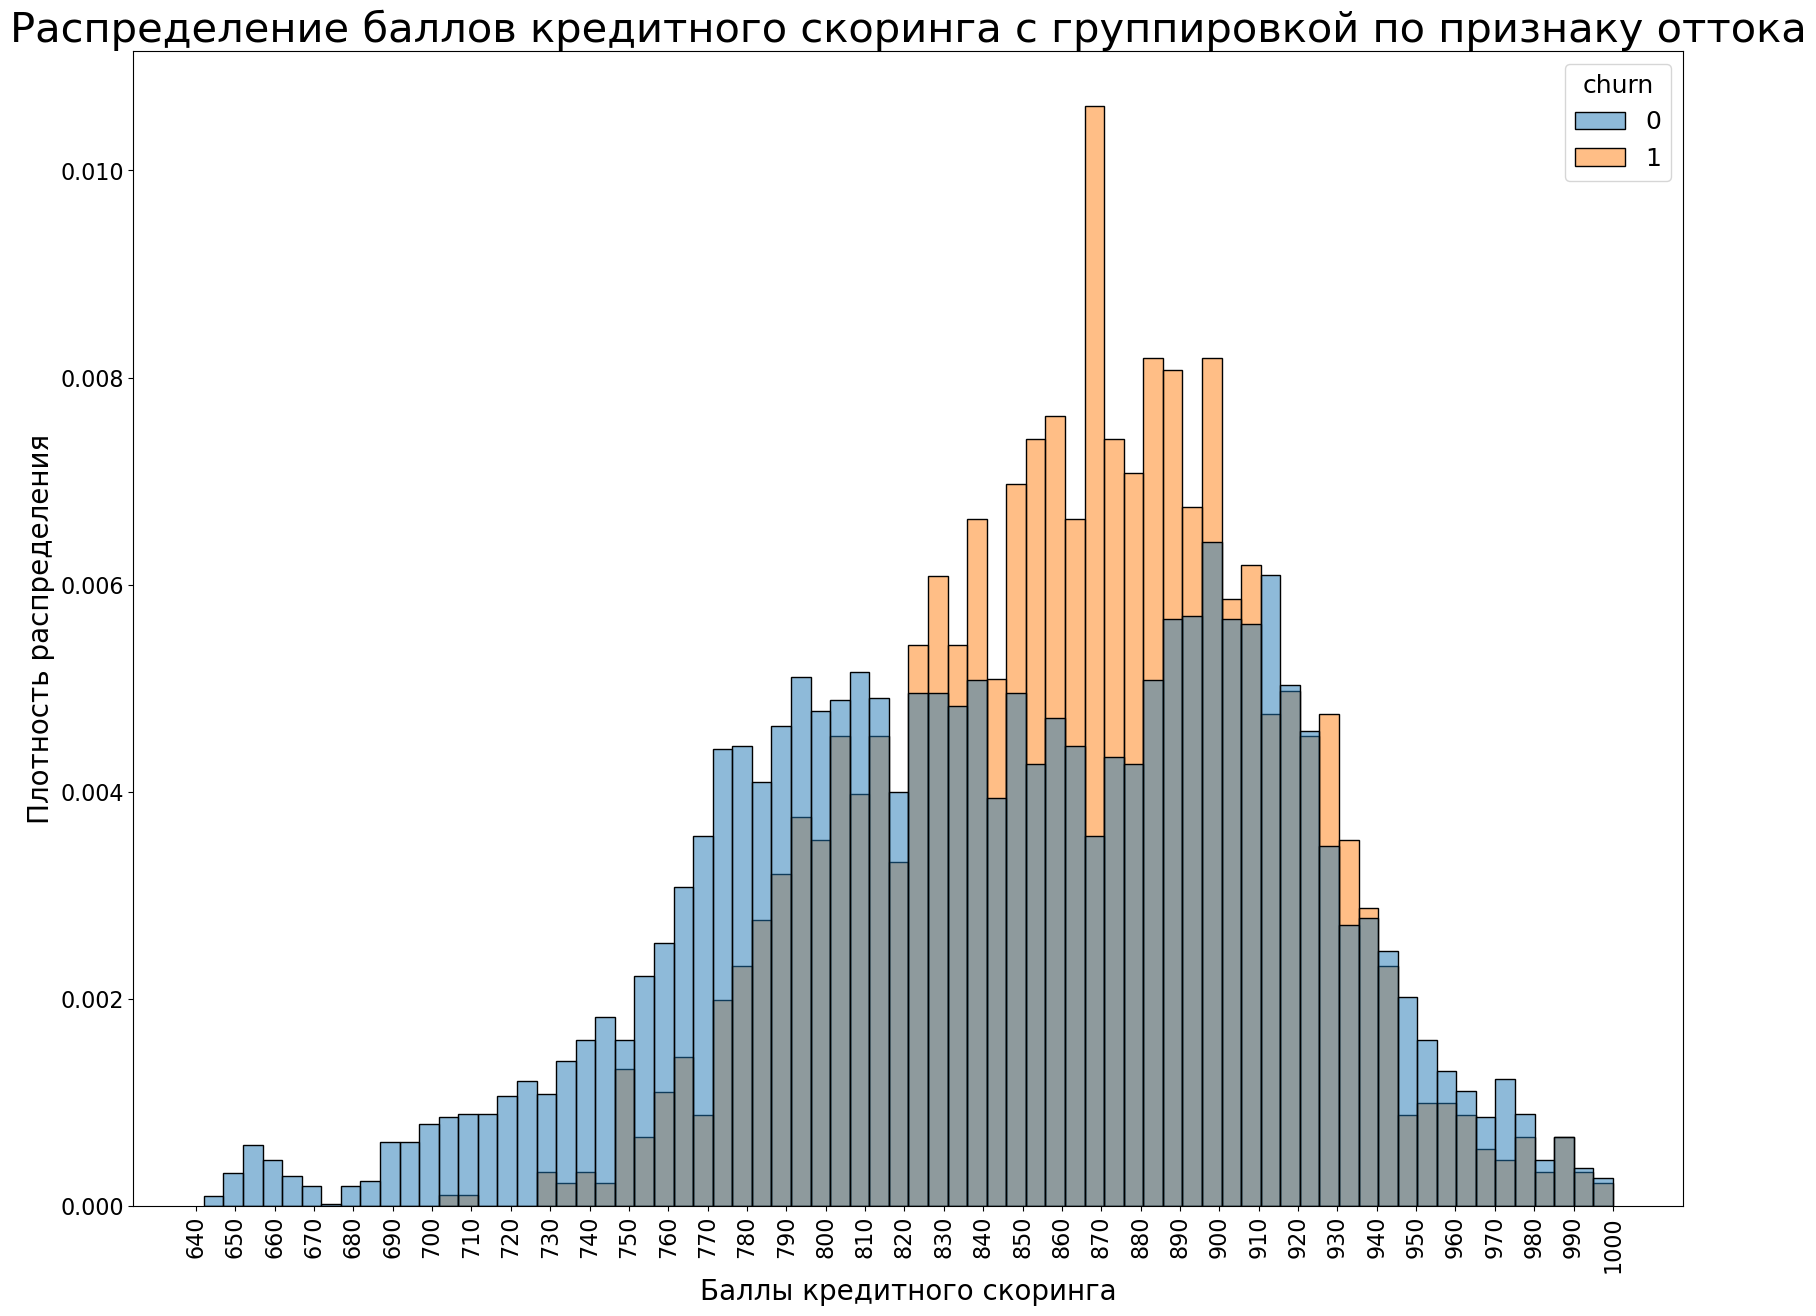

In [24]:
# Создадим гистограмму для распределения баллов кредитного скоринга, сгруппированного по признаку оттока

ax = sns.histplot(data=data,
                  x='score',
                  hue='churn',
                  stat='density',
                  bins=72, # (1000-640)/5 (в каждой корзине по 5 баллов кредитного скоринга)
                  common_norm=False)

ax.set_title('Распределение баллов кредитного скоринга с группировкой по признаку оттока')
ax.set_xlabel('Баллы кредитного скоринга')
ax.set_ylabel('Плотность распределения')
ax.set_xticks(np.arange(int(data['score'].min() - 2),
                        int(data['score'].max() + 10),
                        10))
ax.set_xticklabels(ax.get_xticks(), rotation=90);

Клиенты с баллами кредитного скоринга примерно от 820 до 940 показывают наибольший отток. Увеличим масштаб этой области на графике для более точного определения проблемной области.

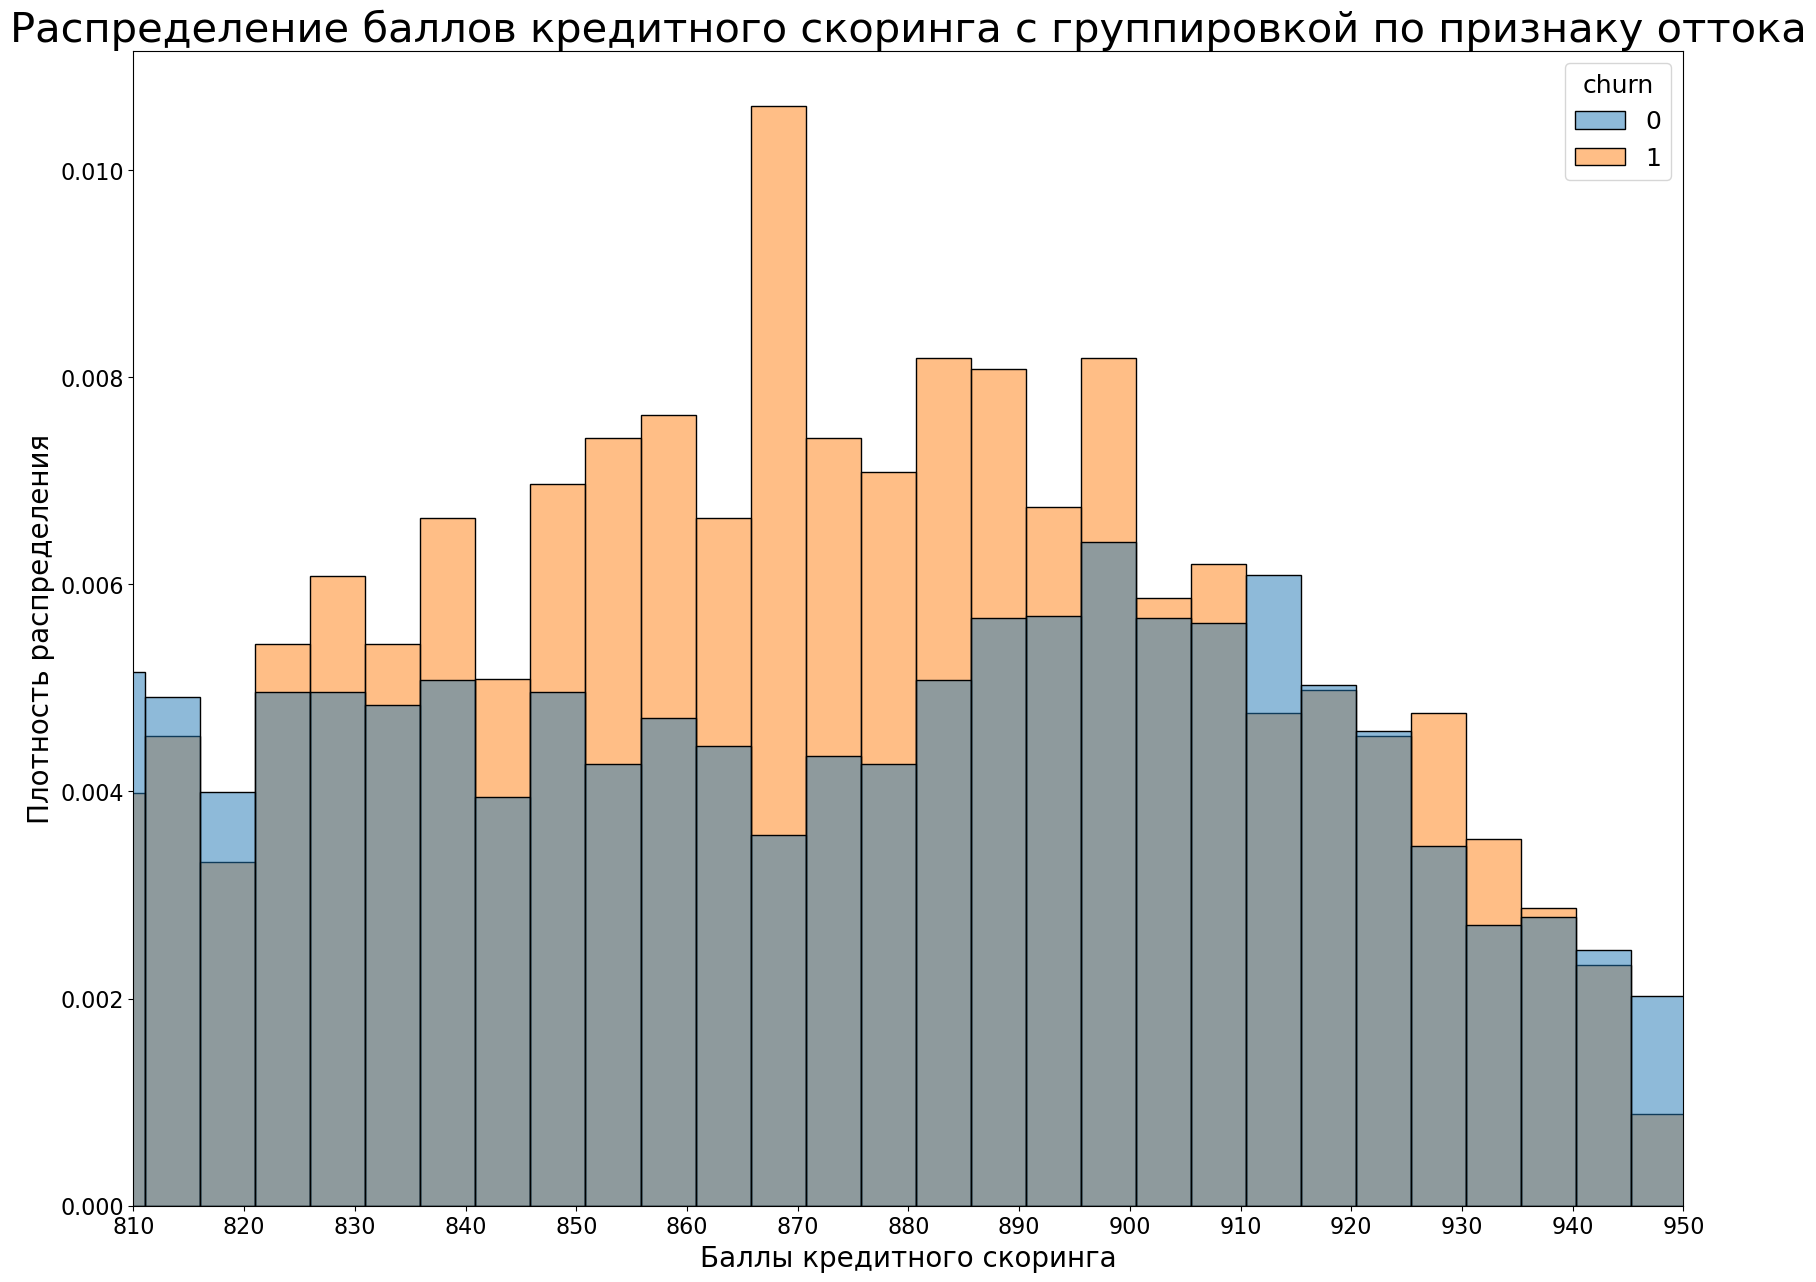

In [25]:
# Создадим гистограмму для распределения баллов кредитного скоринга, сгруппированного по признаку оттока

ax = sns.histplot(data=data,
                  x='score',
                  hue='churn',
                  stat='density',
                  bins=72,
                  common_norm=False)

ax.set_title('Распределение баллов кредитного скоринга с группировкой по признаку оттока')
ax.set_xlabel('Баллы кредитного скоринга')
ax.set_ylabel('Плотность распределения')
ax.set_xticks(np.arange(int(data['score'].min() - 2),
                        int(data['score'].max() + 10),
                        10))
ax.set_xlim(810, 950);

**Проблемная область №1: балл кредитного скоринга от 821 до 940.**

---

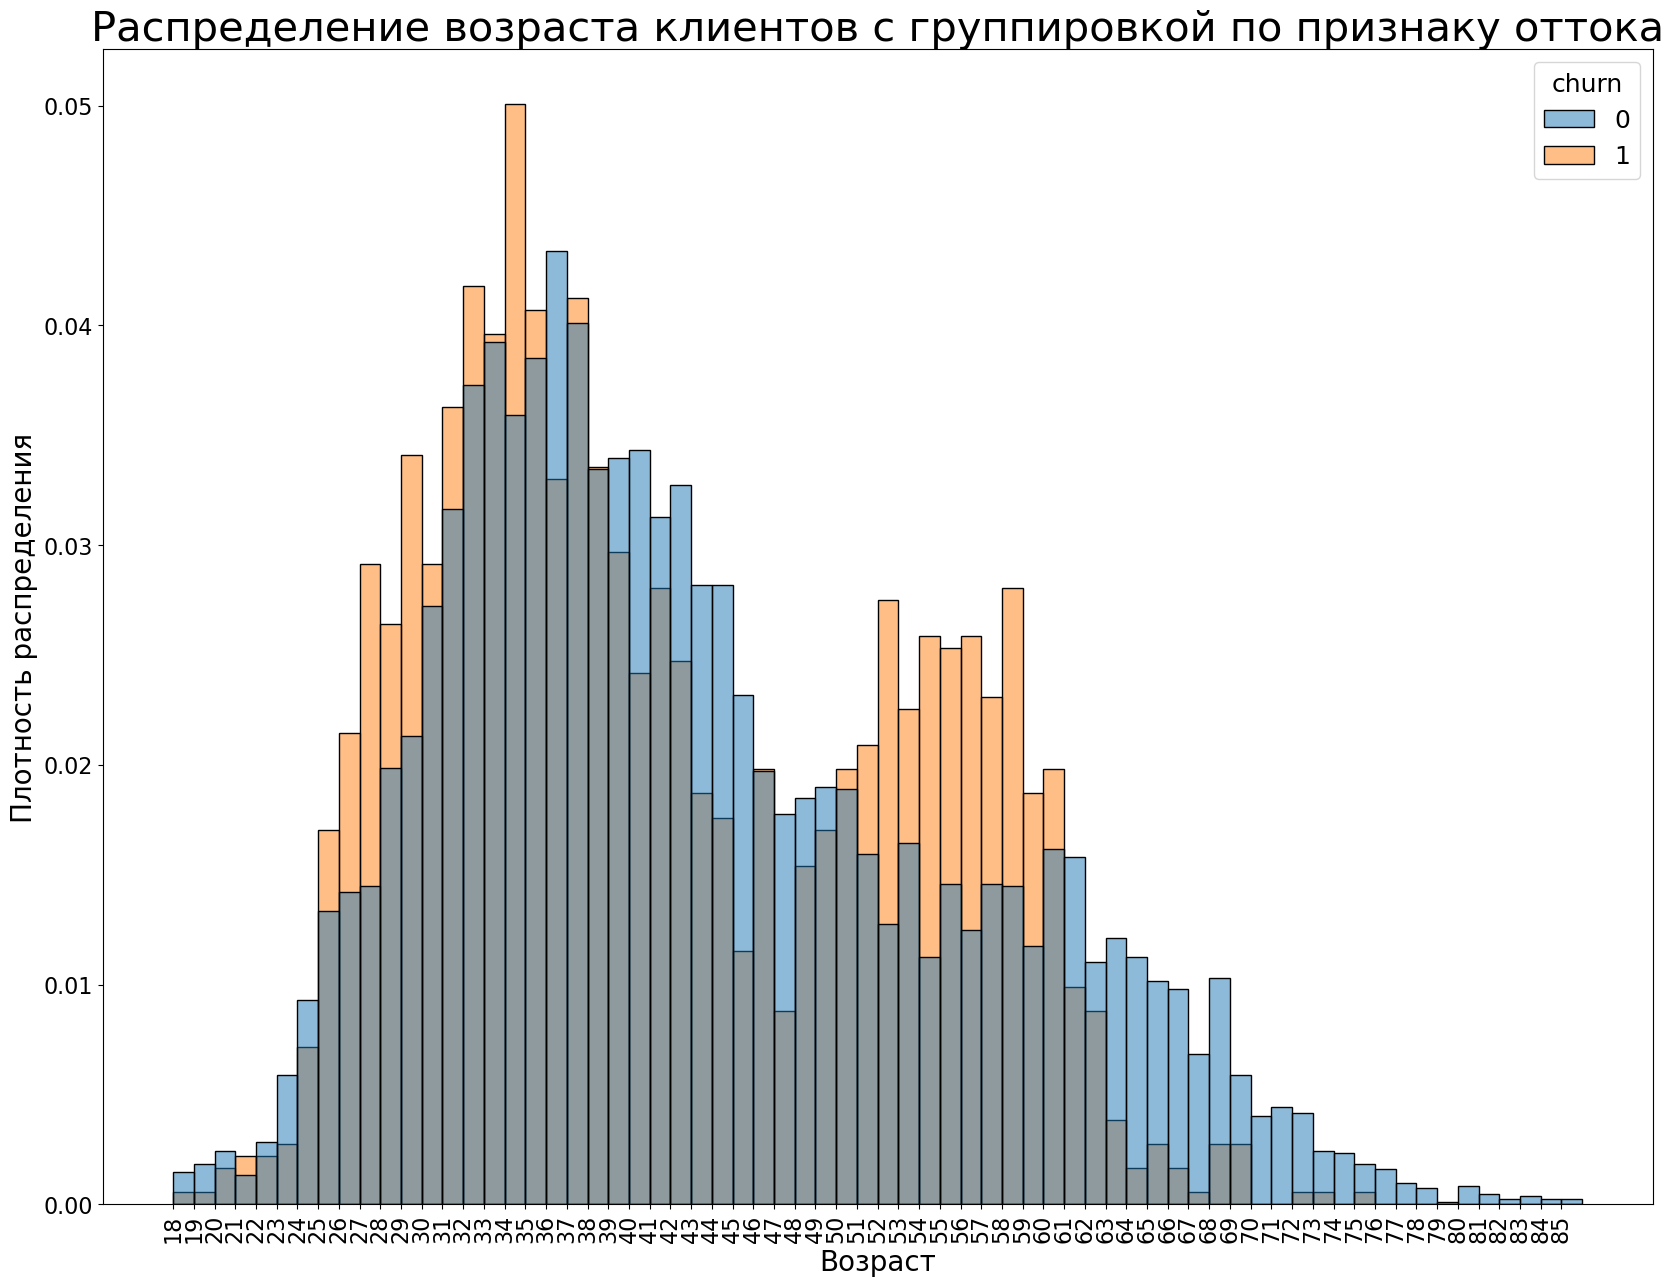

In [26]:
# Создадим гистограмму для распределения возраста клиентов, сгруппированного по признаку оттока

ax = sns.histplot(data=data,
                  x='age',
                  hue='churn',
                  stat='density',
                  bins=int(data['age'].nunique()), # каждая корзина представляет собой возраст клиента
                  common_norm=False)

ax.set_title('Распределение возраста клиентов с группировкой по признаку оттока')
ax.set_xlabel('Возраст')
ax.set_ylabel('Плотность распределения')
ax.set_xticks(np.arange(int(data['age'].min()),
                        int(data['age'].max())))
ax.set_xticklabels(ax.get_xticks(), rotation=90);

**Проблемная область №2: возраст клиента — от 25 до 35 лет и от 50 до 60 лет.**

---

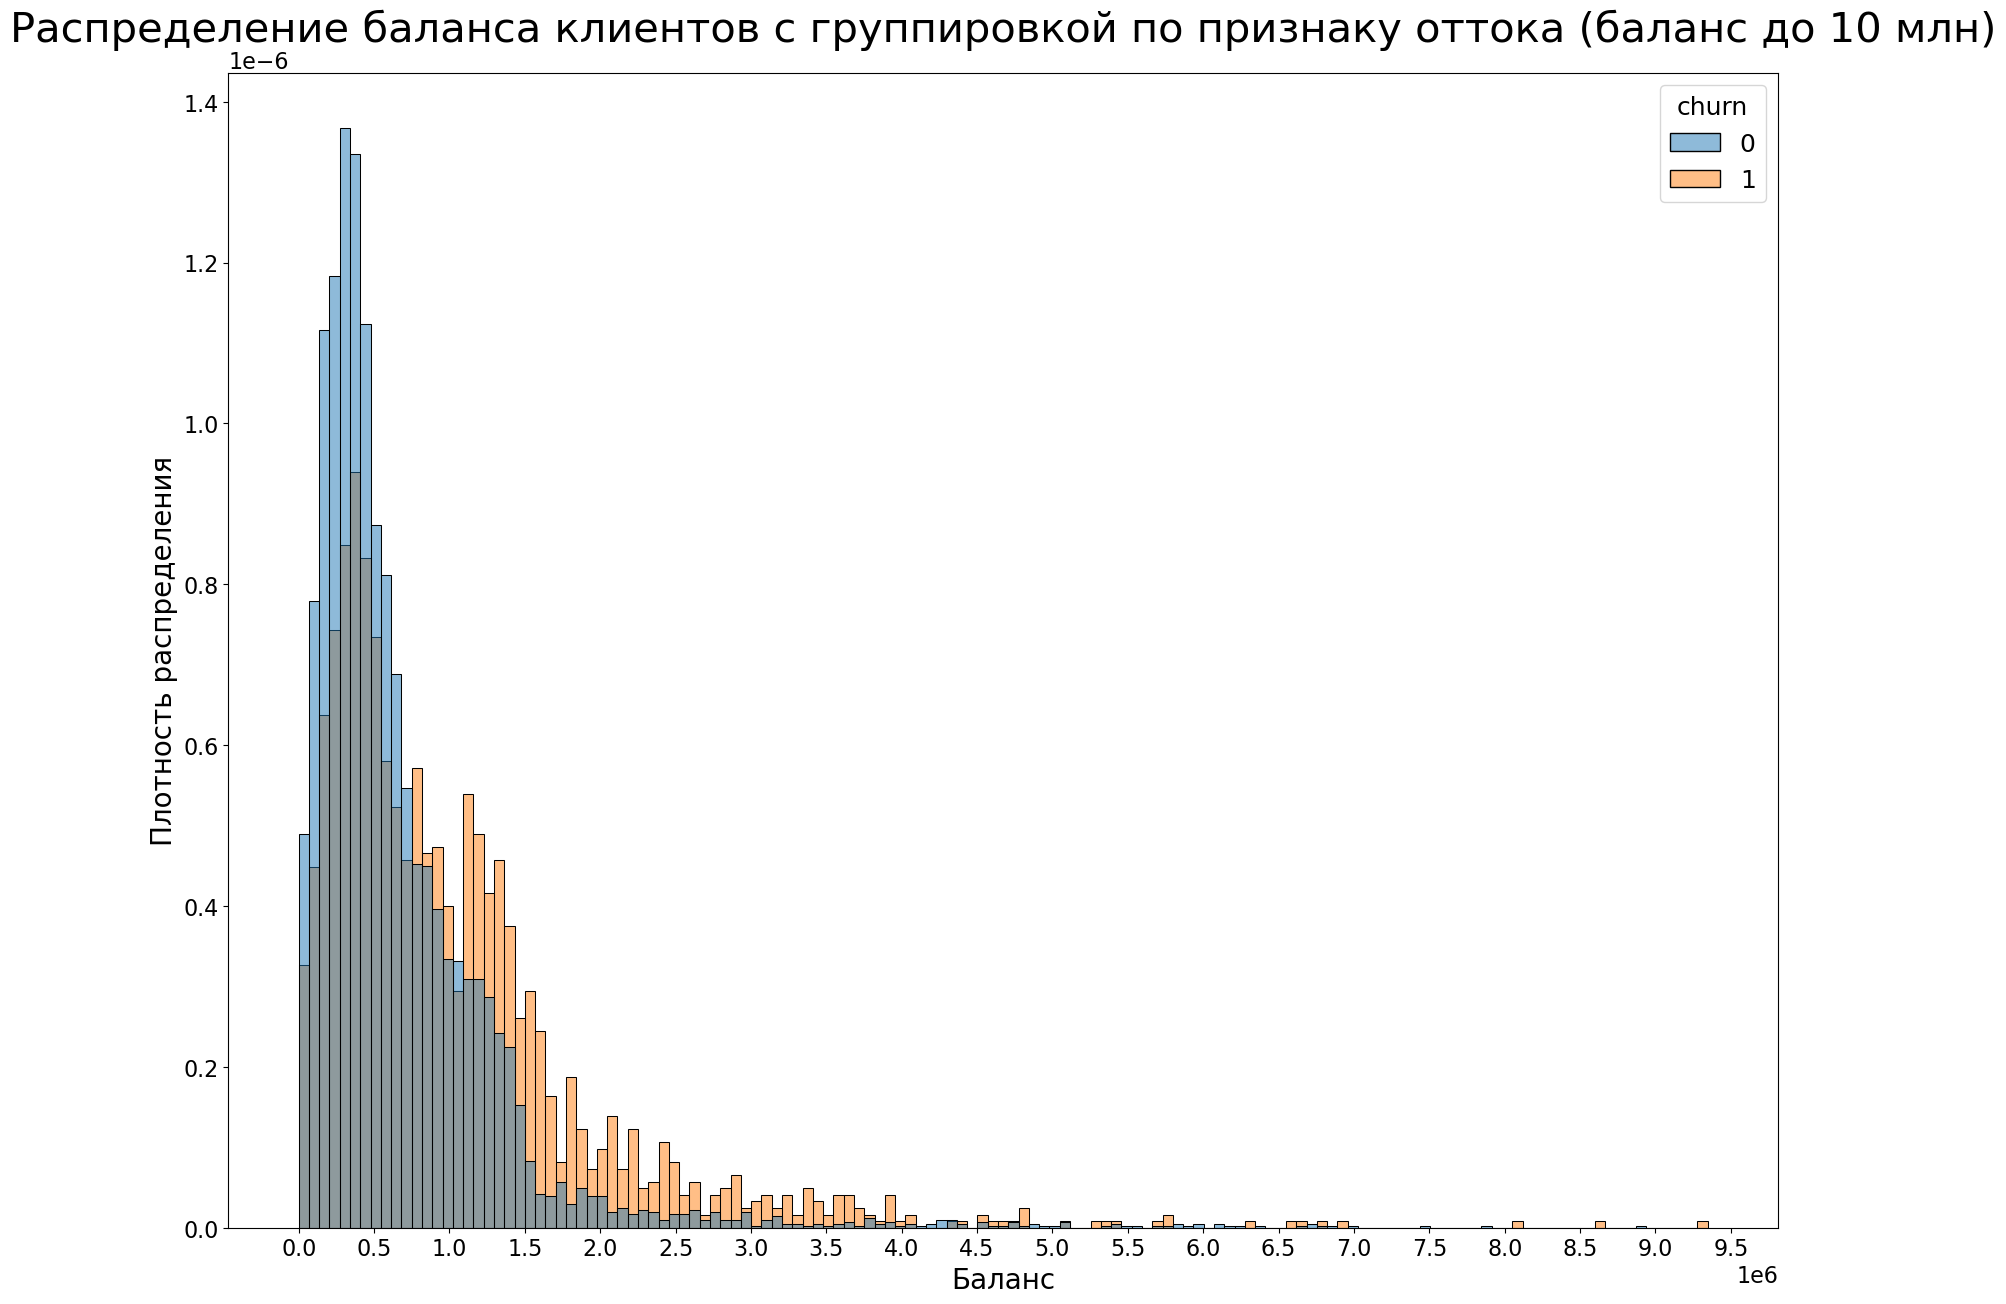

In [27]:
# Создадим гистограмму для распределения баланса клиентов, сгруппированного по признаку оттока (баланс до 10 млн)

ax = sns.histplot(data=data[data['balance'] < 10000000],
                  x='balance',
                  hue='churn',
                  stat='density',
                  common_norm=False)

ax.set_title('Распределение баланса клиентов с группировкой по признаку оттока (баланс до 10 млн)')
ax.set_xlabel('Баланс')
ax.set_ylabel('Плотность распределения')
ax.set_xticks(range(0, 10000000, 500000));

Отток клиентов начинается примерно после 500 000 рублей баланса. Рассмотрим эту область крупнее.

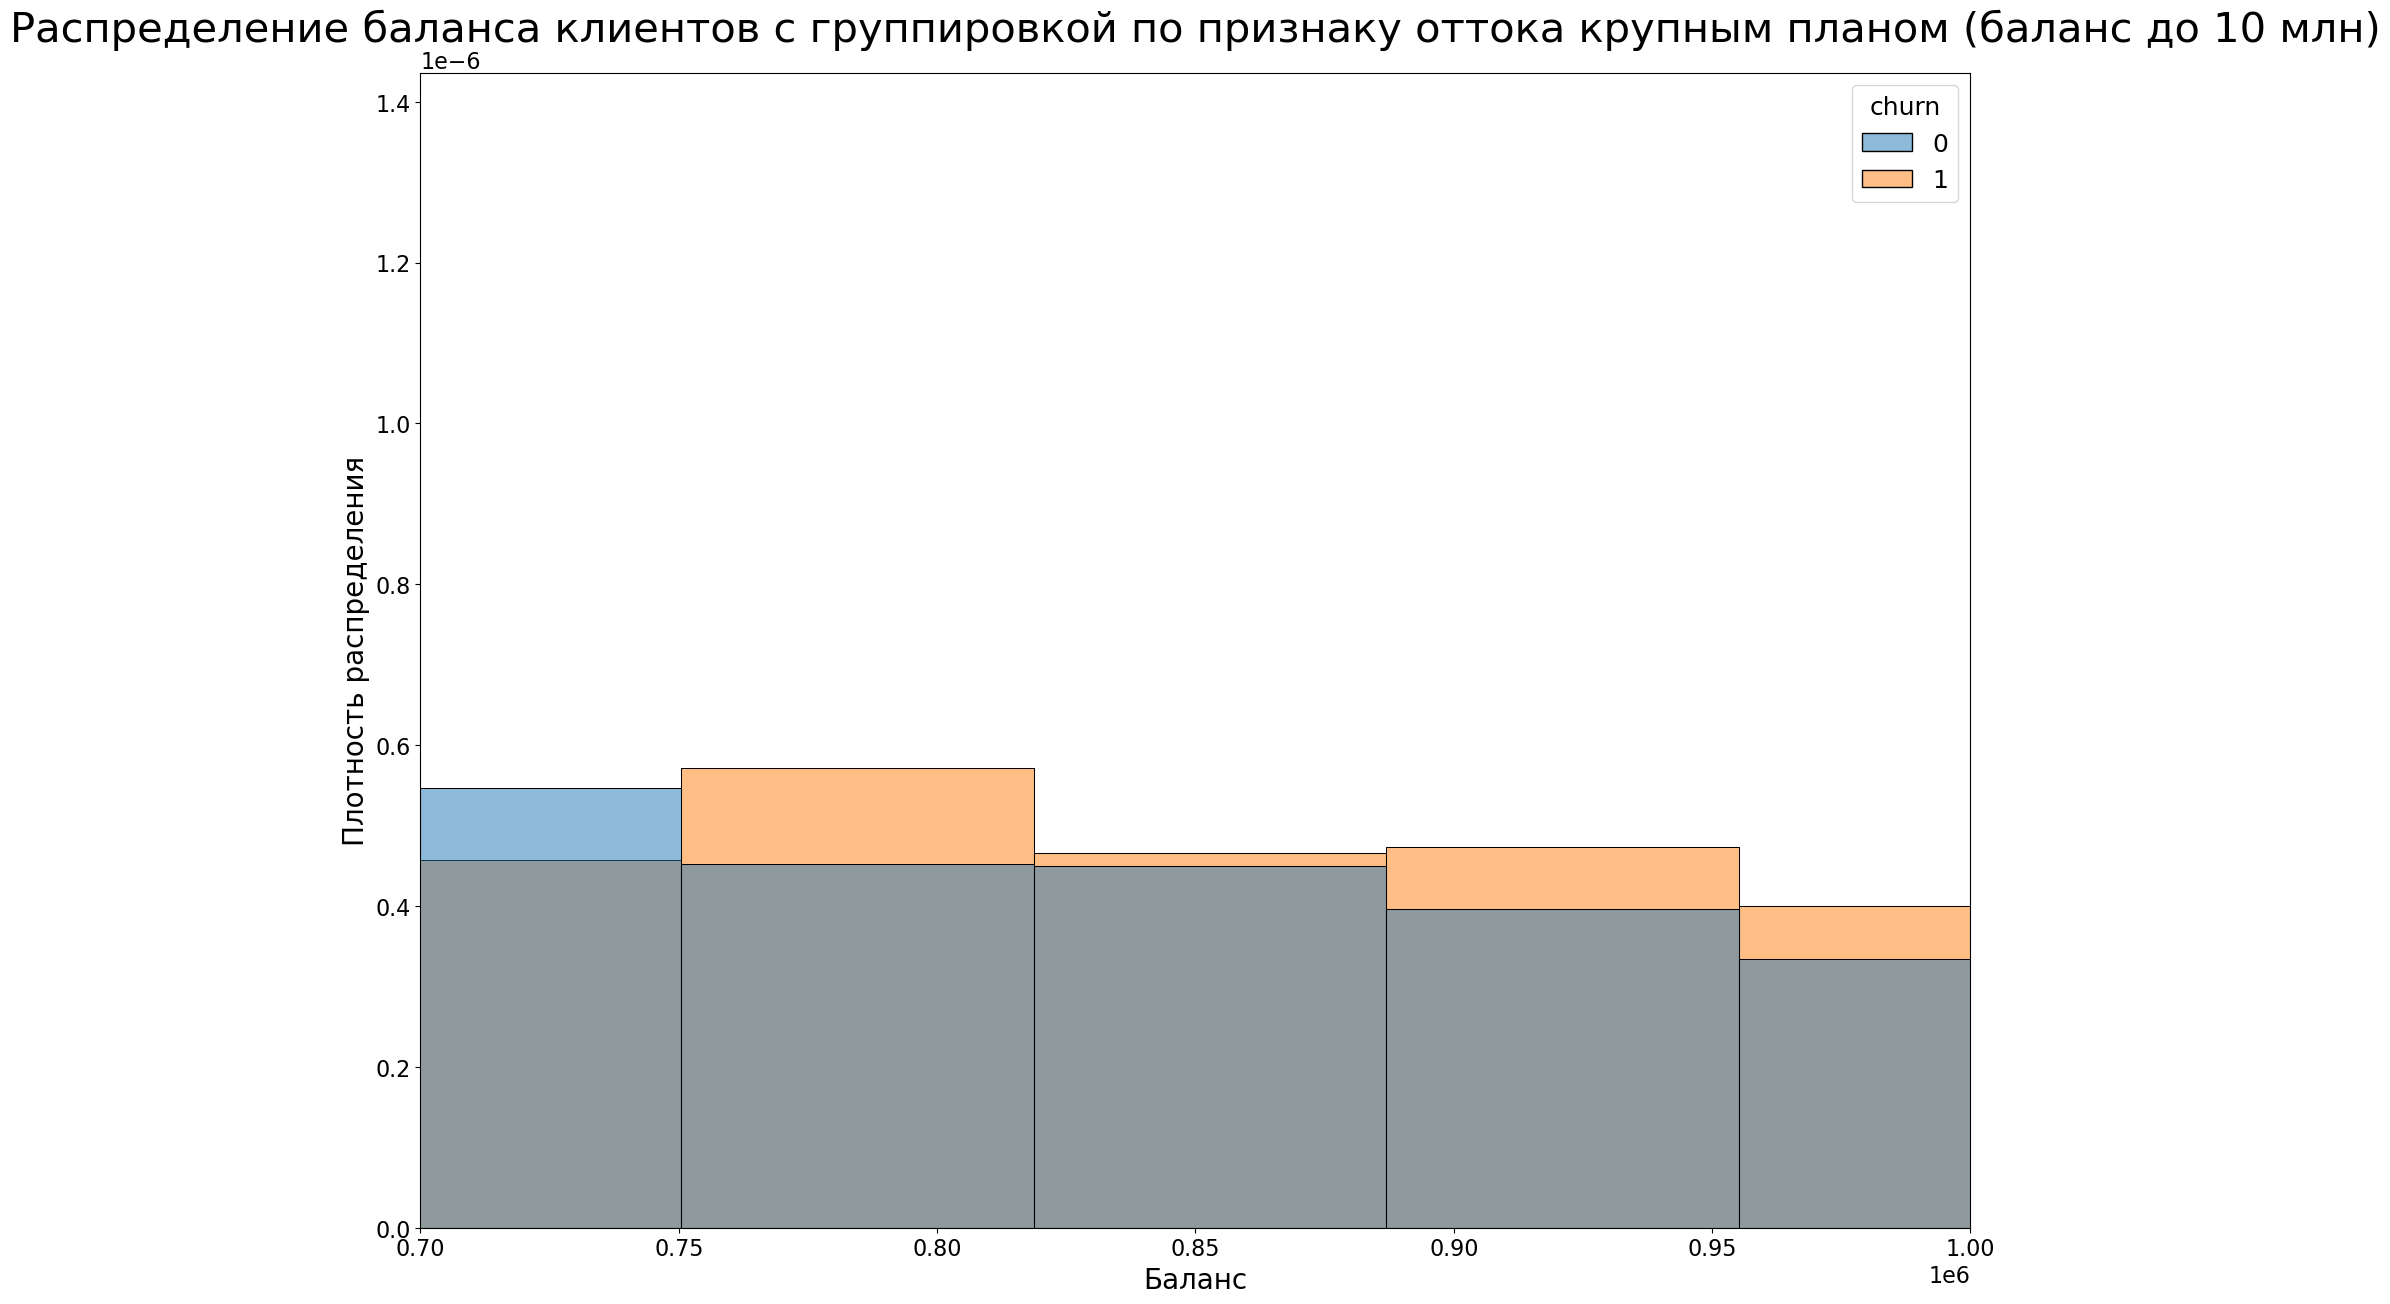

In [28]:
# Создадим гистограмму для распределения баланса клиентов, сгруппированного по признаку оттока (баланс до 10 млн)

ax = sns.histplot(data=data[data['balance'] < 10000000],
                  x='balance',
                  hue='churn',
                  stat='density',
                  common_norm=False)

ax.set_title('Распределение баланса клиентов с группировкой по признаку оттока крупным планом (баланс до 10 млн)')
ax.set_xlabel('Баланс')
ax.set_ylabel('Плотность распределения')
ax.set_xlim(700000, 1000000);

**Проблемная область №3: баланс от 750 тыс. рублей.**

---

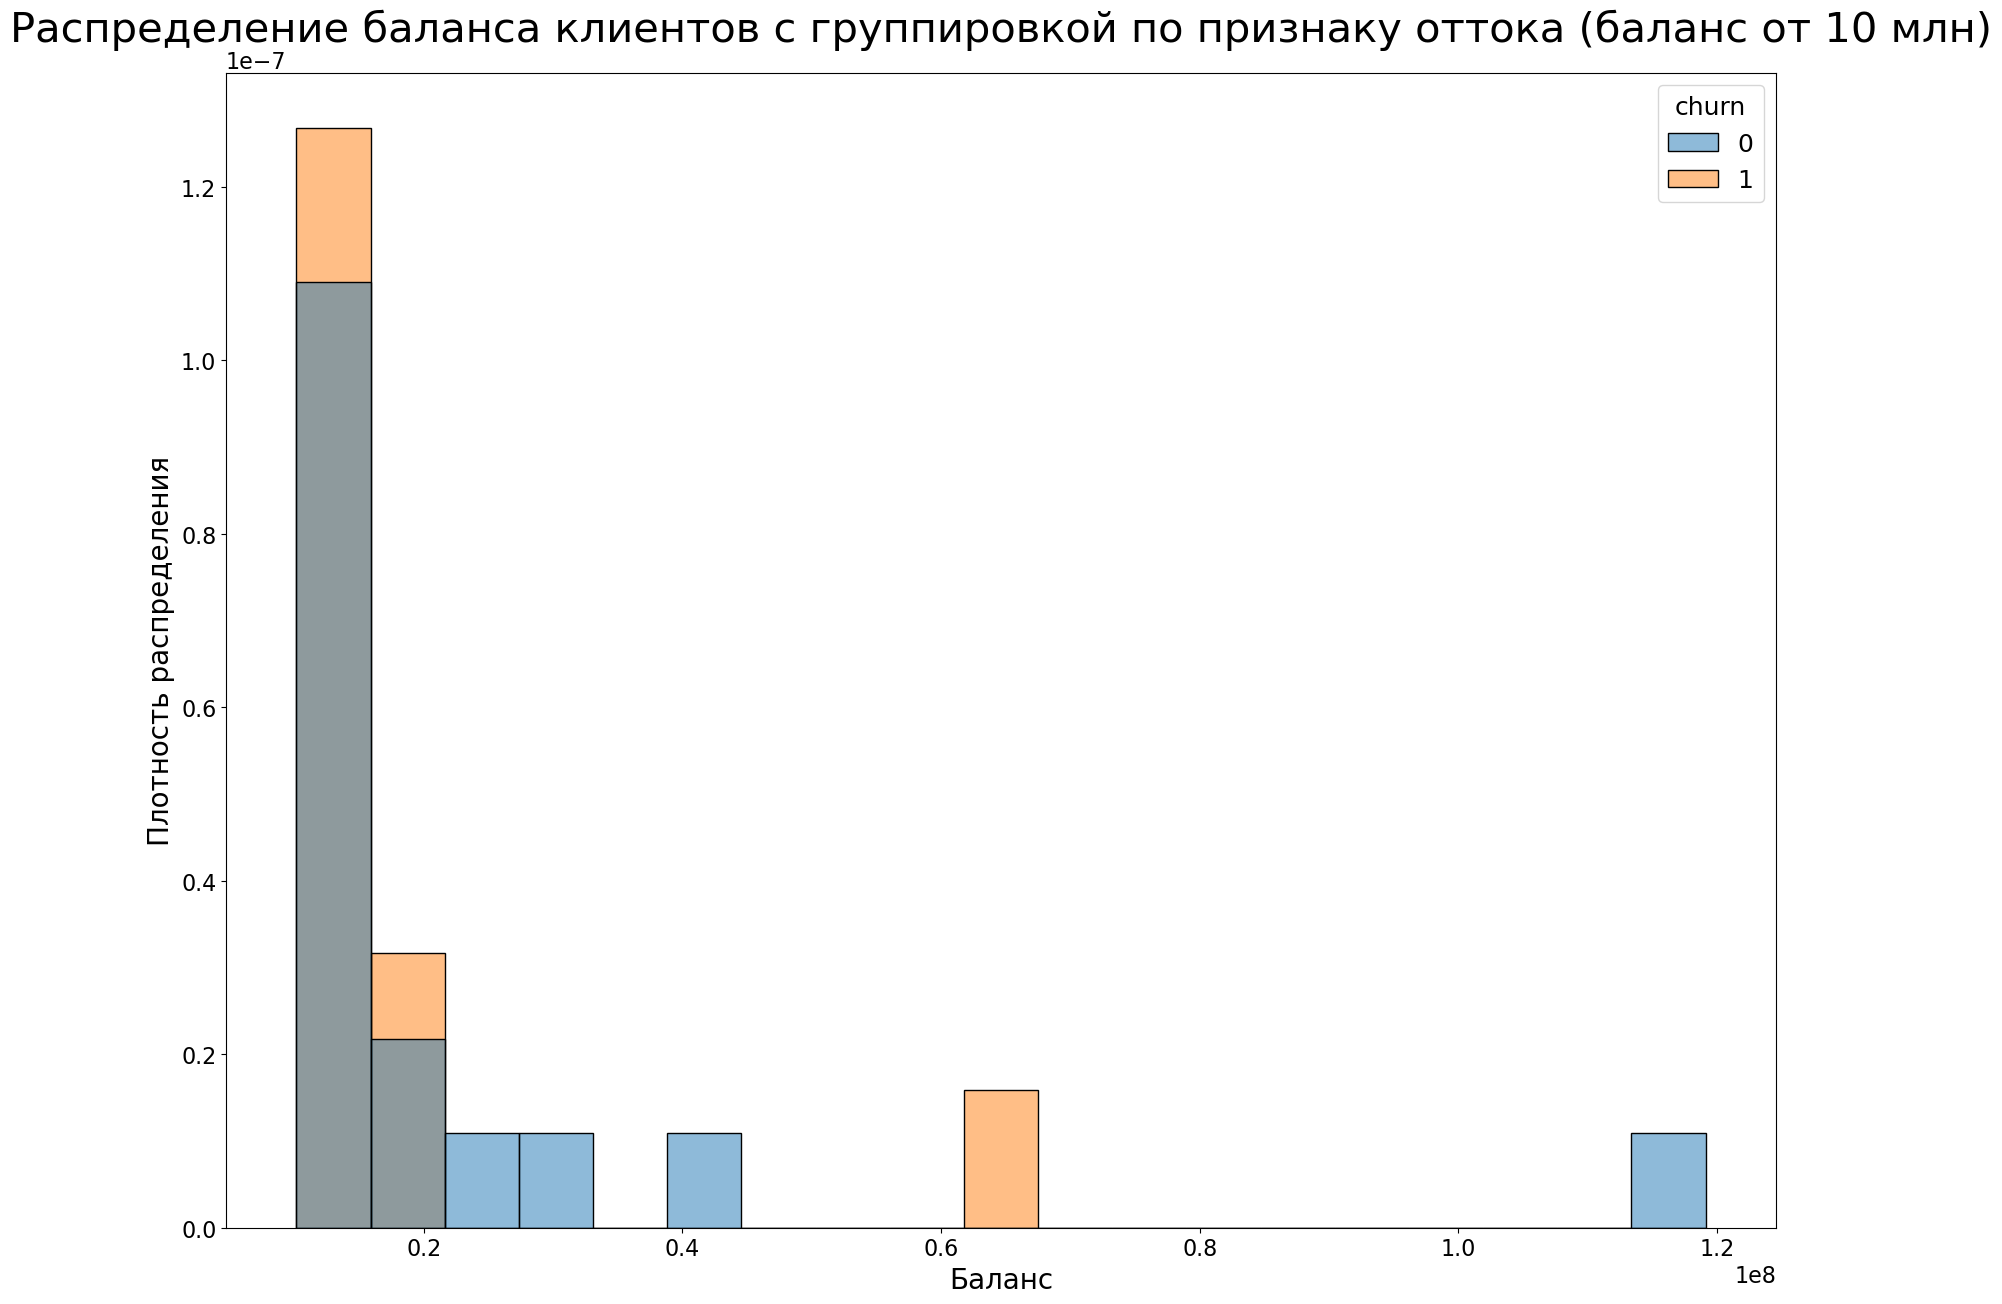

In [29]:
# Создадим гистограмму для распределения баланса клиентов, сгруппированного по признаку оттока (баланс от 10 млн)

ax = sns.histplot(data=data[data['balance'] >= 10000000],
                  x='balance',
                  hue='churn',
                  stat='density',
                  common_norm=False)

ax.set_title('Распределение баланса клиентов с группировкой по признаку оттока (баланс от 10 млн)')
ax.set_xlabel('Баланс')
ax.set_ylabel('Плотность распределения');

Для клиентов с балансом больше 10 млн нельзя выделить проблемную область.

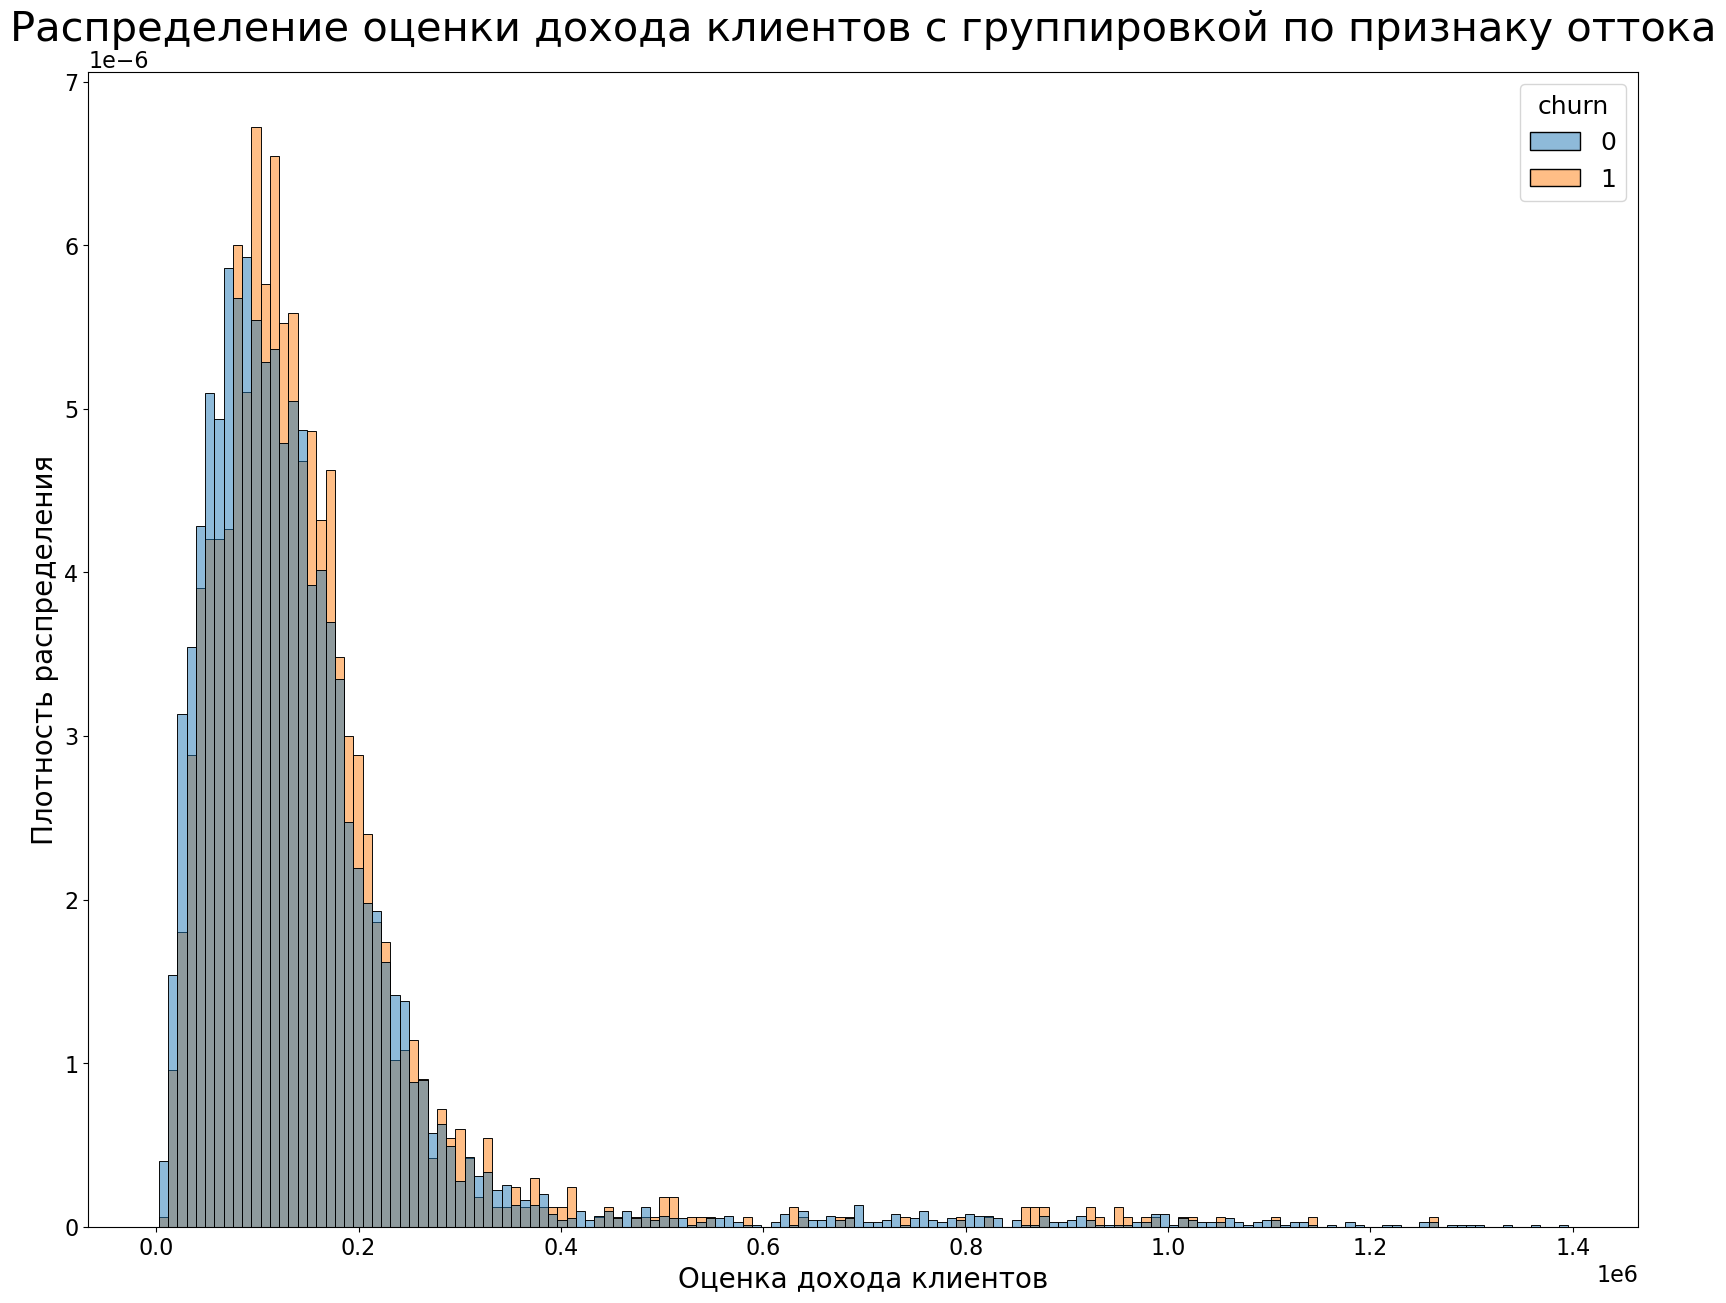

In [30]:
# Создадим гистограмму для распределения оценки дохода клиентов, сгруппированного по признаку оттока

ax = sns.histplot(data=data,
                  x='est_salary',
                  hue='churn',
                  stat='density',
                  common_norm=False)

ax.set_title('Распределение оценки дохода клиентов с группировкой по признаку оттока')
ax.set_xlabel('Оценка дохода клиентов')
ax.set_ylabel('Плотность распределения');

Отток начинается для клиентов в оценкой доходов на промежутке от 0 до 200 тыс. ₽ — необходимо подробнее рассмотреть этот сегмент. Длинный хвост распределения, начинающийся с оценкой доходов от 400 тыс. ₽, не показывает сегментов с однозначным оттоком.

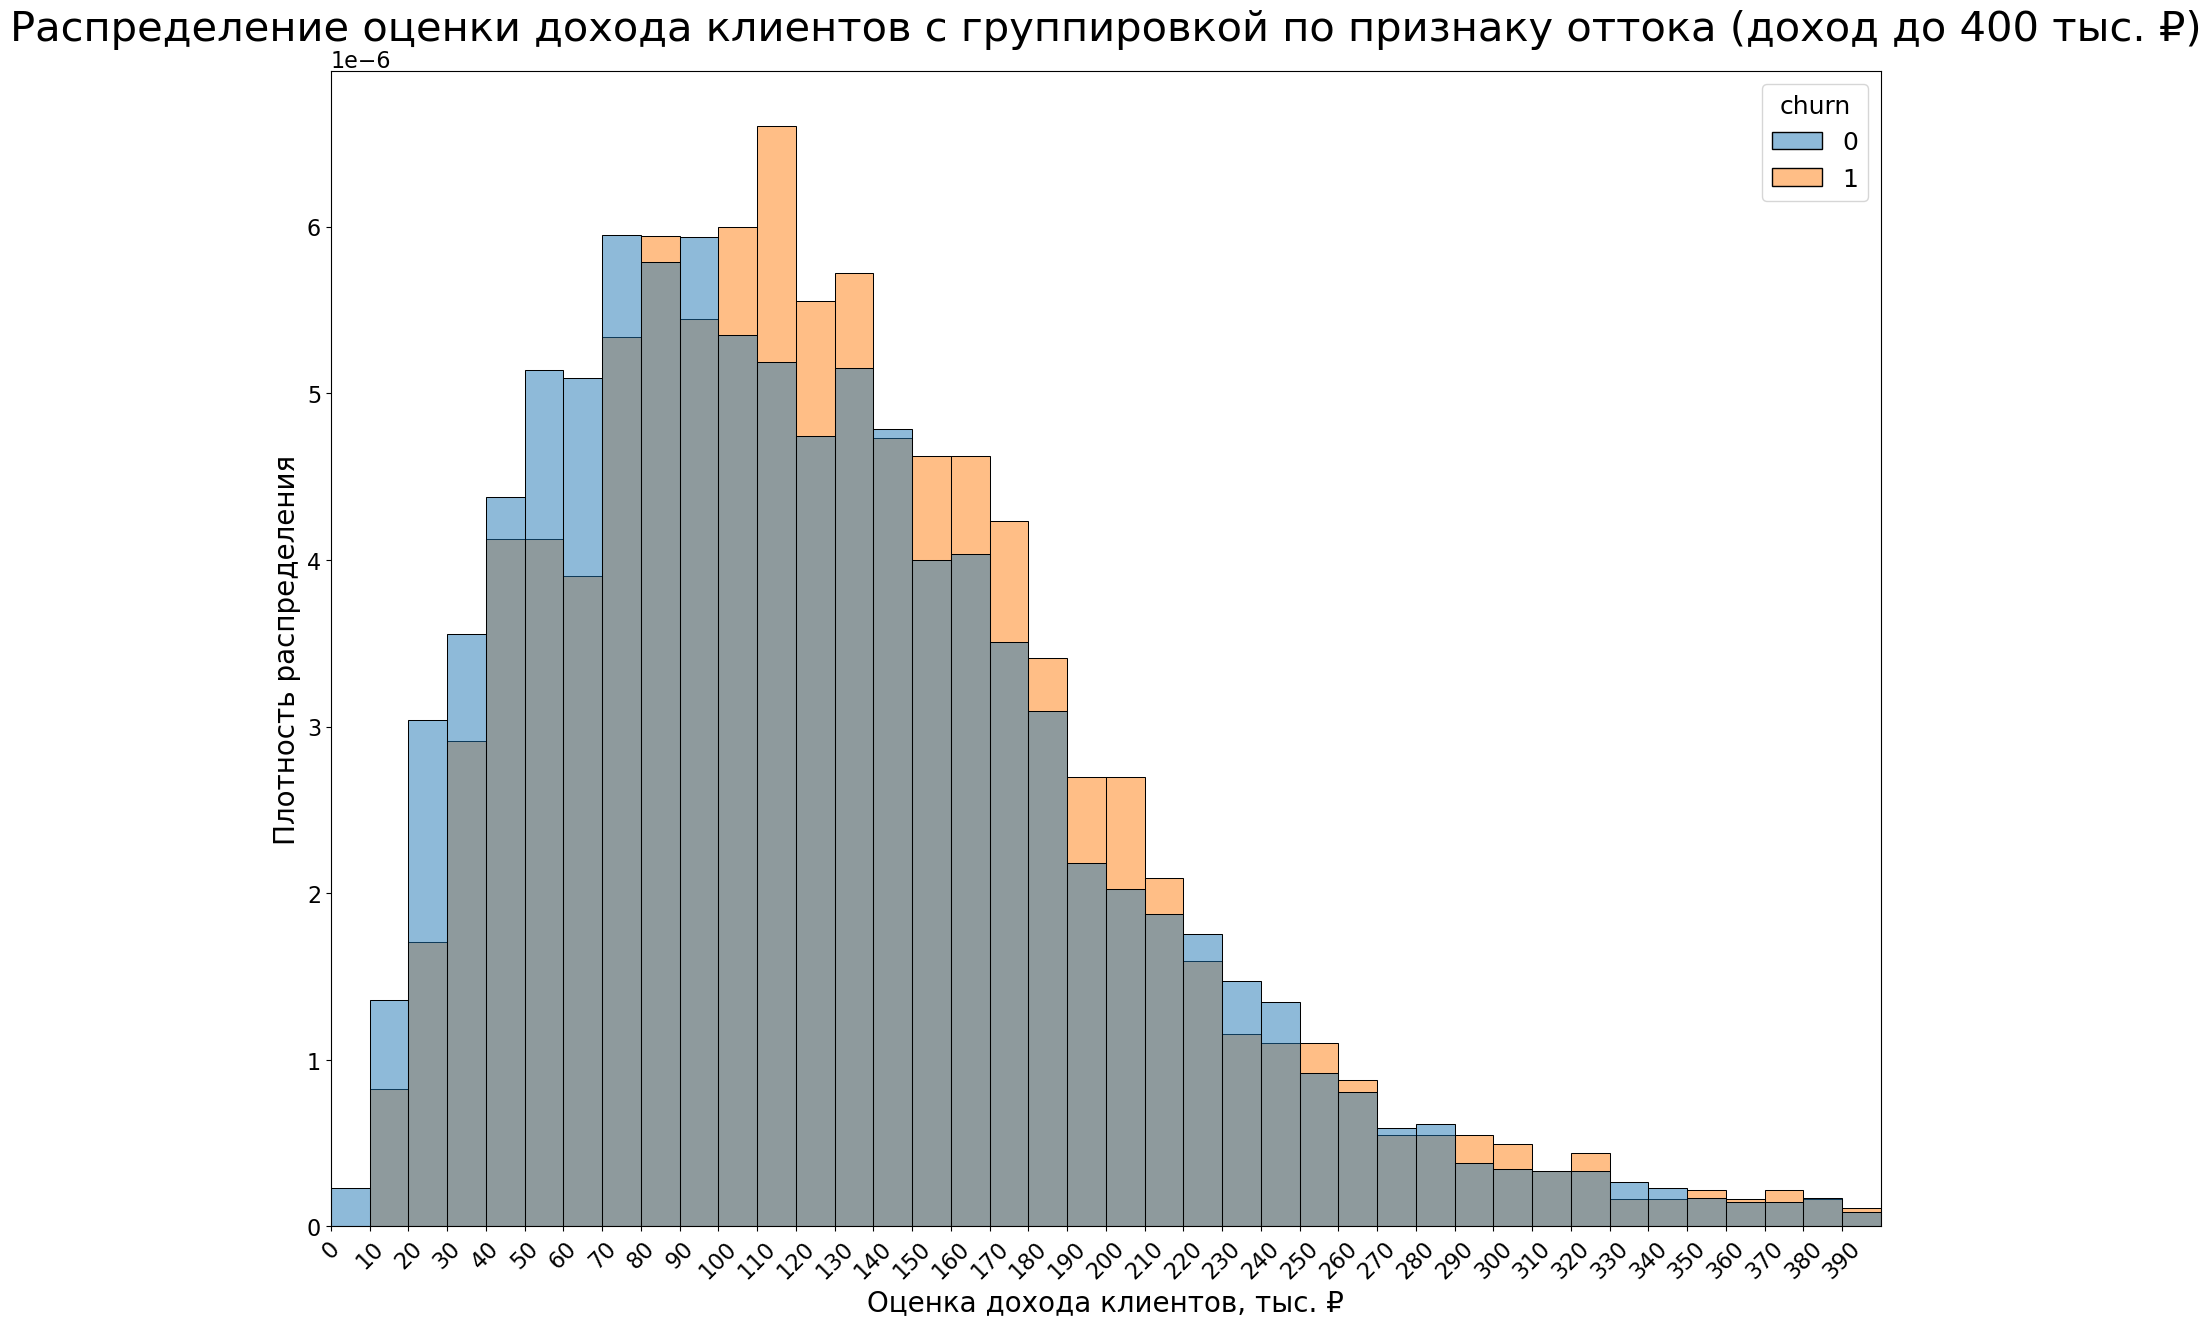

In [31]:
# Создадим гистограмму для распределения оценки дохода клиентов, сгруппированного по признаку оттока (доход до 400 тыс. ₽)

ax = sns.histplot(data=data,
                  x='est_salary',
                  hue='churn',
                  stat='density',
                  bins=np.arange(start=0,
                                 stop=max(data['est_salary']),
                                 step=10000),
                  common_norm=False)

ax.set_title('Распределение оценки дохода клиентов с группировкой по признаку оттока (доход до 400 тыс. ₽)')
ax.set_xlabel('Оценка дохода клиентов, тыс. ₽')
ax.set_ylabel('Плотность распределения')
ax.set_xlim(0, 400000)
ax.set_xticks(range(0, 400000, 10000))
ax.set_xticklabels(ax.get_xticks(), rotation=45)

# Отформатируем подписи горизонтальной оси

def format_tick(val, pos):
    return f'{int(val/1000)}'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_tick))

**Проблемная область №4: клиенты с оценкой дохода:**

- **от 80 до 90 тыс. ₽,**
- **от 100 до 140 тыс. ₽,**
- **от 150 до 220 тыс. ₽,**
- **от 250 до 270 тыс. ₽,**
- **от 290 до 330 тыс. ₽.**

In [32]:
# Создадим функцию для построения столбчатой диаграммы и добавления средней линии оттока

def plot_bar_chart(data, x_column, title, x_label, ax):
    
    # Поcчитаем количество наблюдений для каждой категории
    
    count_series = data[x_column].value_counts().sort_index()
    
    # Построим столбчатую диаграмму
    
    barplot = sns.barplot(x=x_column,
                          y='churn',
                          data=data,
                          ci=None,
                          ax=ax,
                          order=count_series.index)
    
    # Добавим среднюю линию оттока
    
    ax.axhline(data['churn'].mean(),
               color='red',
               linestyle='--')
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Доля оттока')

    # Аннотируем каждый столбец количеством наблюдений
    
    for i, bar in enumerate(ax.patches):
        ax.annotate(f"{count_series.iloc[i]}", 
                    (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha='center', va='bottom', fontsize=10)  

/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_17453/3003003118.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x=x_column,
/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_17453/3003003118.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x=x_column,
/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_17453/3003003118.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x=x_column,
/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_17453/3003003118.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x=x_column,
/var/folders/hj/fqskmm_j7yl8t2b6z10ntj2c0000gn/T/ipykernel_17453/3003003118.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None

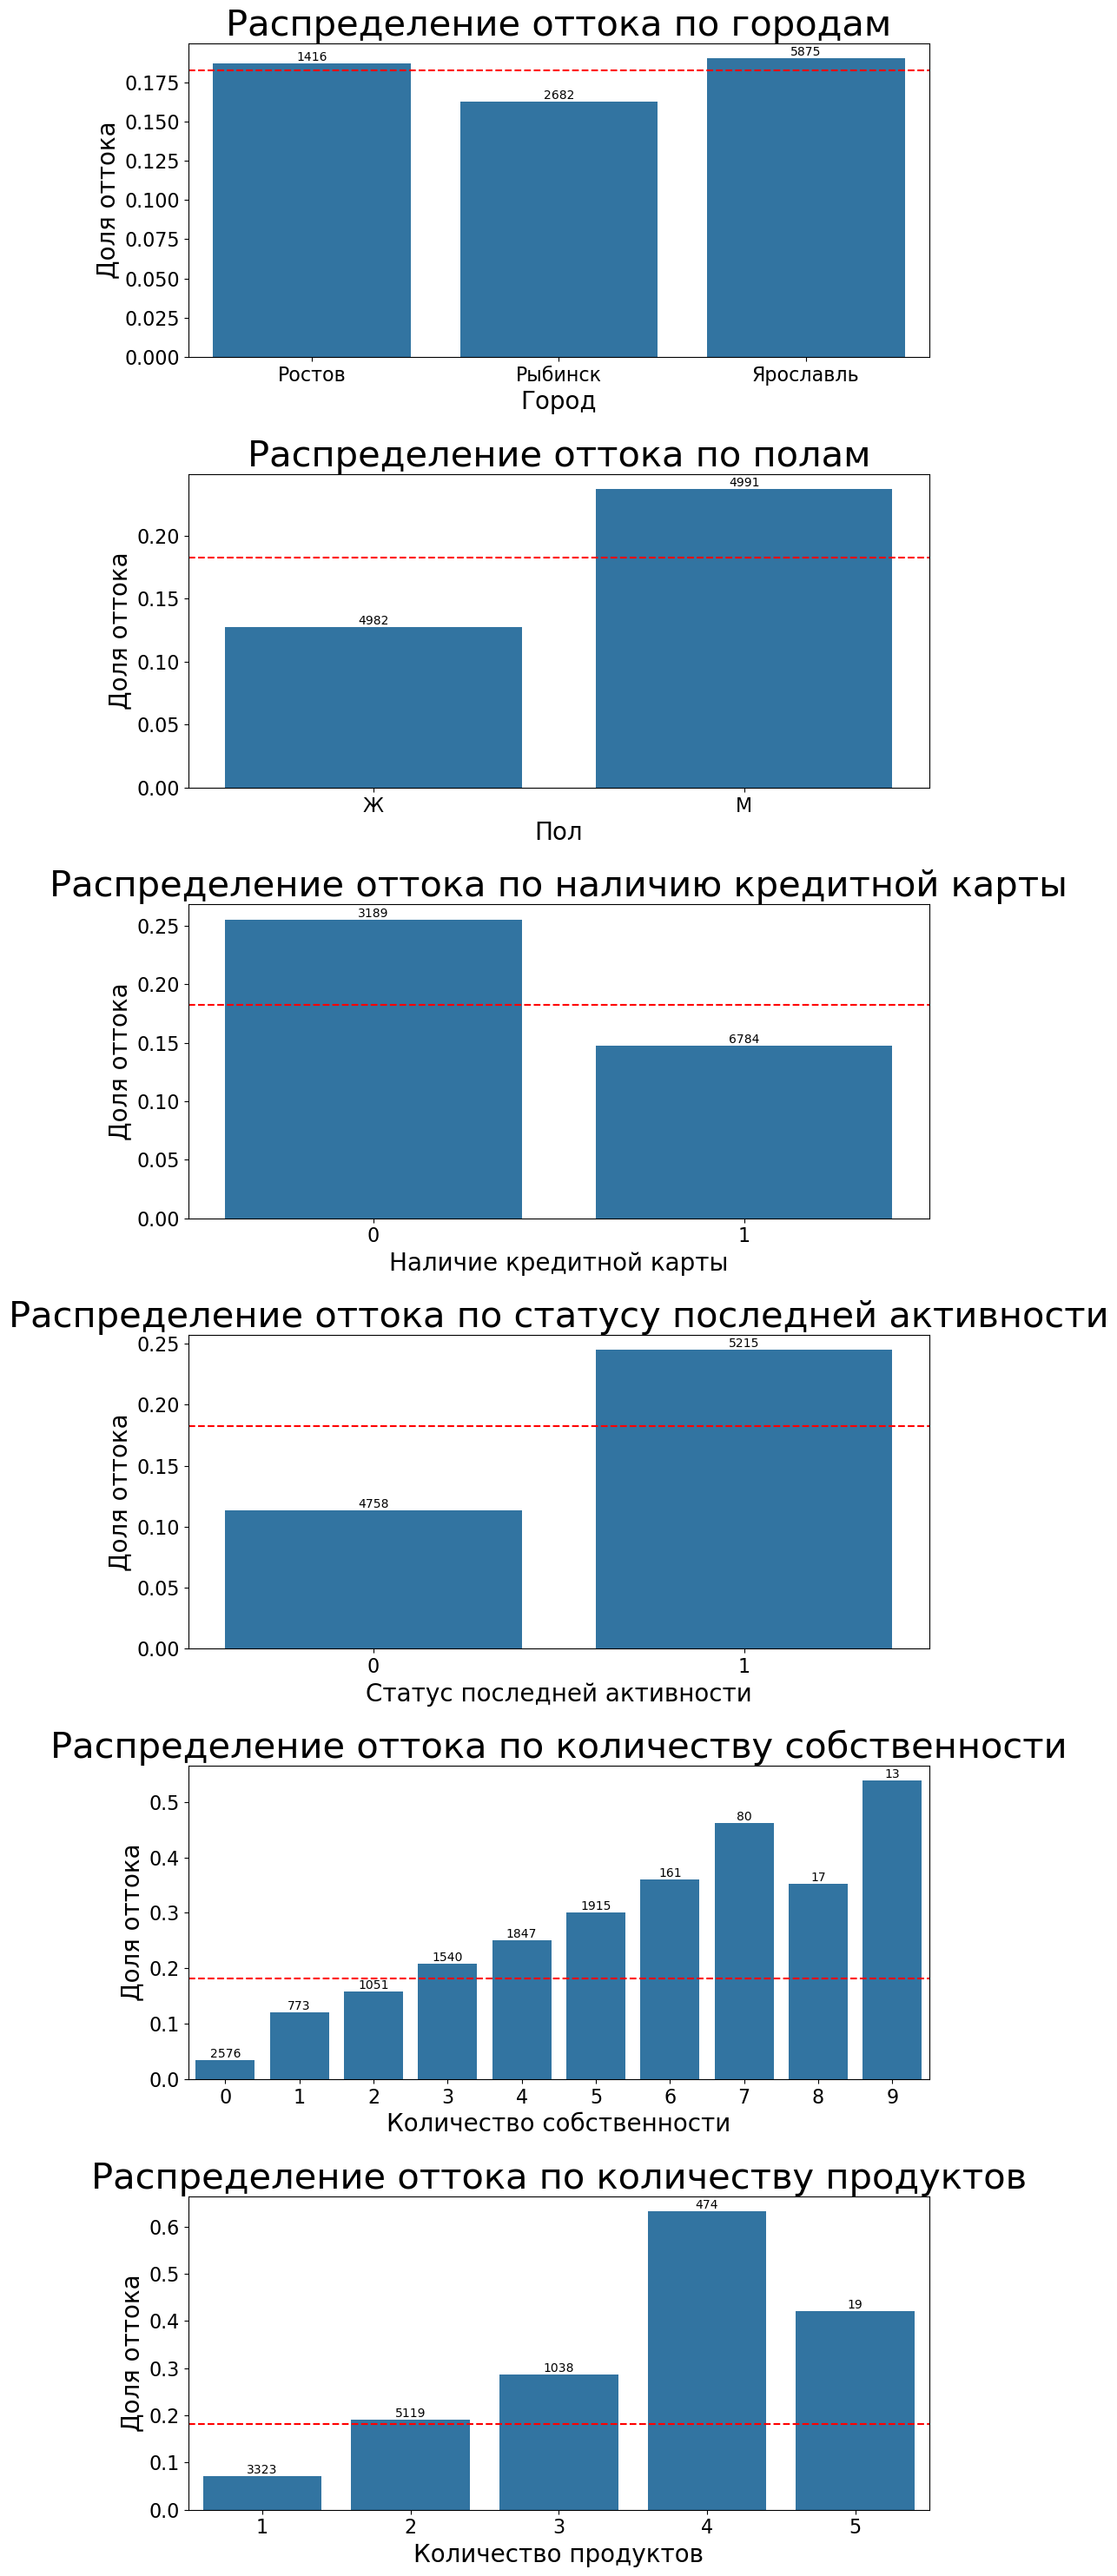

In [33]:
# Создадим фигуру с 6 графиками, расположенными вертикально

fig, axes = plt.subplots(6, 1, figsize=(10, 30))

# Создадим столбчатые диаграммы для категориальных переменных

plot_bar_chart(data,
               'city',
               'Распределение оттока по городам',
               'Город',
               axes[0])

plot_bar_chart(data,
               'gender',
               'Распределение оттока по полам',
               'Пол',
               axes[1])

plot_bar_chart(data,
               'credit_card',
               'Распределение оттока по наличию кредитной карты',
               'Наличие кредитной карты',
               axes[2])

plot_bar_chart(data,
               'last_activity',
               'Распределение оттока по статусу последней активности',
               'Статус последней активности',
               axes[3])

plot_bar_chart(data,
               'equity',
               'Распределение оттока по количеству собственности',
               'Количество собственности',
               axes[4])

plot_bar_chart(data,
               'products',
               'Распределение оттока по количеству продуктов',
               'Количество продуктов',
               axes[5])

plt.tight_layout()

**Проблемная область №5: Ярославль и Ростов.** Только в Рыбинске нет проблемы оттока клиентов, потому что доля оттока ниже, чем в среднем по трём городам.

**Проблемная область №6: мужчины.** Для них уровень оттока выше среднего по клиентам всех полов.

**Проблемная область №7: количество собственности от 3 до 9.**

**Проблемная область №8: клиенты с количеством банковских продуктов от 3 до 5.**

**Проблемная область №9: клиенты без кредитной карты.**

**Проблемная область №10: активные клиенты банка.**

---

**Промежуточные выводы**

Анализ распределения признаков по отдельности выявил 10 сегментов клиентов, которые склонны к уходу из банка.

Таким образом, можно описать типичного отточного клиента:
- мужчина;
- возраст — от 25 до 35 лет и от 50 до 60 лет;
- живёт в Ярославле или Ростове;
- балл кредитного скоринга — от 821 до 940;
- баланс на счёте от 750 тыс. ₽; 
- оценка дохода:
    - от 80 до 90 тыс. ₽,
    - от 100 до 140 тыс. ₽,
    - от 150 до 220 тыс. ₽,
    - от 250 до 270 тыс. ₽,
    - от 290 до 330 тыс. ₽.
- имеет от 3 до 9 объектов собственности;
- имеет от 3 до 5 банковских продуктов;
- не имеет кредитной карты;
- активно пользуется банком.

#### Портрет клиента

In [34]:
grouped_data_churn = (data.groupby('churn')
                      .agg({'score': 'mean',
                            'est_salary': ['mean', 'median'],
                            'age': 'mean',
                            'balance': ['mean', 'median'],
                            'products': 'median',
                            'equity': 'median',
                            'city': lambda x: x.mode()[0],
                            'gender': lambda x: x.mode()[0]})
                      .reset_index())

# Переименуем колонки

grouped_data_churn.columns = ['churn',
                              'mean_score',
                              'mean_salary',
                              'median_salary',
                              'mean_age',
                              'mean_balance',
                              'median_balance',
                              'median_products',
                              'median_equity',
                              'mode_city',
                              'mode_gender']

# Вычислим относительную разницу

relative_difference_churn = (((grouped_data_churn.iloc[1, 1:9].astype(float) -
                               grouped_data_churn.iloc[0, 1:9].astype(float)) /
                              grouped_data_churn.iloc[0, 1:9].astype(float)) * 100).round(2)


# Создадим итоговую таблицу

final_table_churn = pd.DataFrame({'Показатель': ['Средний балл скоринга',
                                                 'Средняя зарплата',
                                                 'Медианная зарплата',
                                                 'Средний возраст',
                                                 'Средний баланс',
                                                 'Медианный баланс',
                                                 'Медианное количество продуктов',
                                                 'Медианное количество собственности',
                                                 'Мода по городу',
                                                 'Мода по полу'],
                                  'Отток': grouped_data_churn.iloc[1, 1:].tolist(),
                                  'Не отток': grouped_data_churn.iloc[0, 1:].tolist(),
                                  'Относительная разница, %': (relative_difference_churn.tolist() + ['NaN', 'NaN'])})

# Округлим числовые значения в столбцах "Отток" и "Не отток" до целых чисел

final_table_churn.iloc[:, 1:3] = final_table_churn.iloc[:, 1:3].map(lambda x: int(round(x, 0)) if isinstance(x, float) else x)

final_table_churn

,Показатель,Отток,Не отток,"Относительная разница, %"
0,Средний балл скоринга,863,845,2.13
1,Средняя зарплата,148357,147675,0.46
2,Медианная зарплата,125409,118228,6.07
3,Средний возраст,41,43,-3.7
4,Средний баланс,1134458,733032,54.76
5,Медианный баланс,783909,475410,64.89
6,Медианное количество продуктов,2,2,0.0
7,Медианное количество собственности,4,3,33.33
8,Мода по городу,Ярославль,Ярославль,NaN
9,Мода по полу,М,Ж,NaN


**Промежуточные выводы**

Центральные тенденции для отточного клиента:
- мужчина;
- средний возраст ниже на 2 года и составляет 41 год;
- средний балл кредитного скоринга выше на 2% и составляет 863 балла;
- медианная зарплата выше на 6% и составляет 125 тыс. ₽;
- медианный баланс выше на 65% и составляет 782 тыс. ₽;
- медианное количество собственности на 1 больше и составляет 4 объекта.

#### Корреляционный анализ

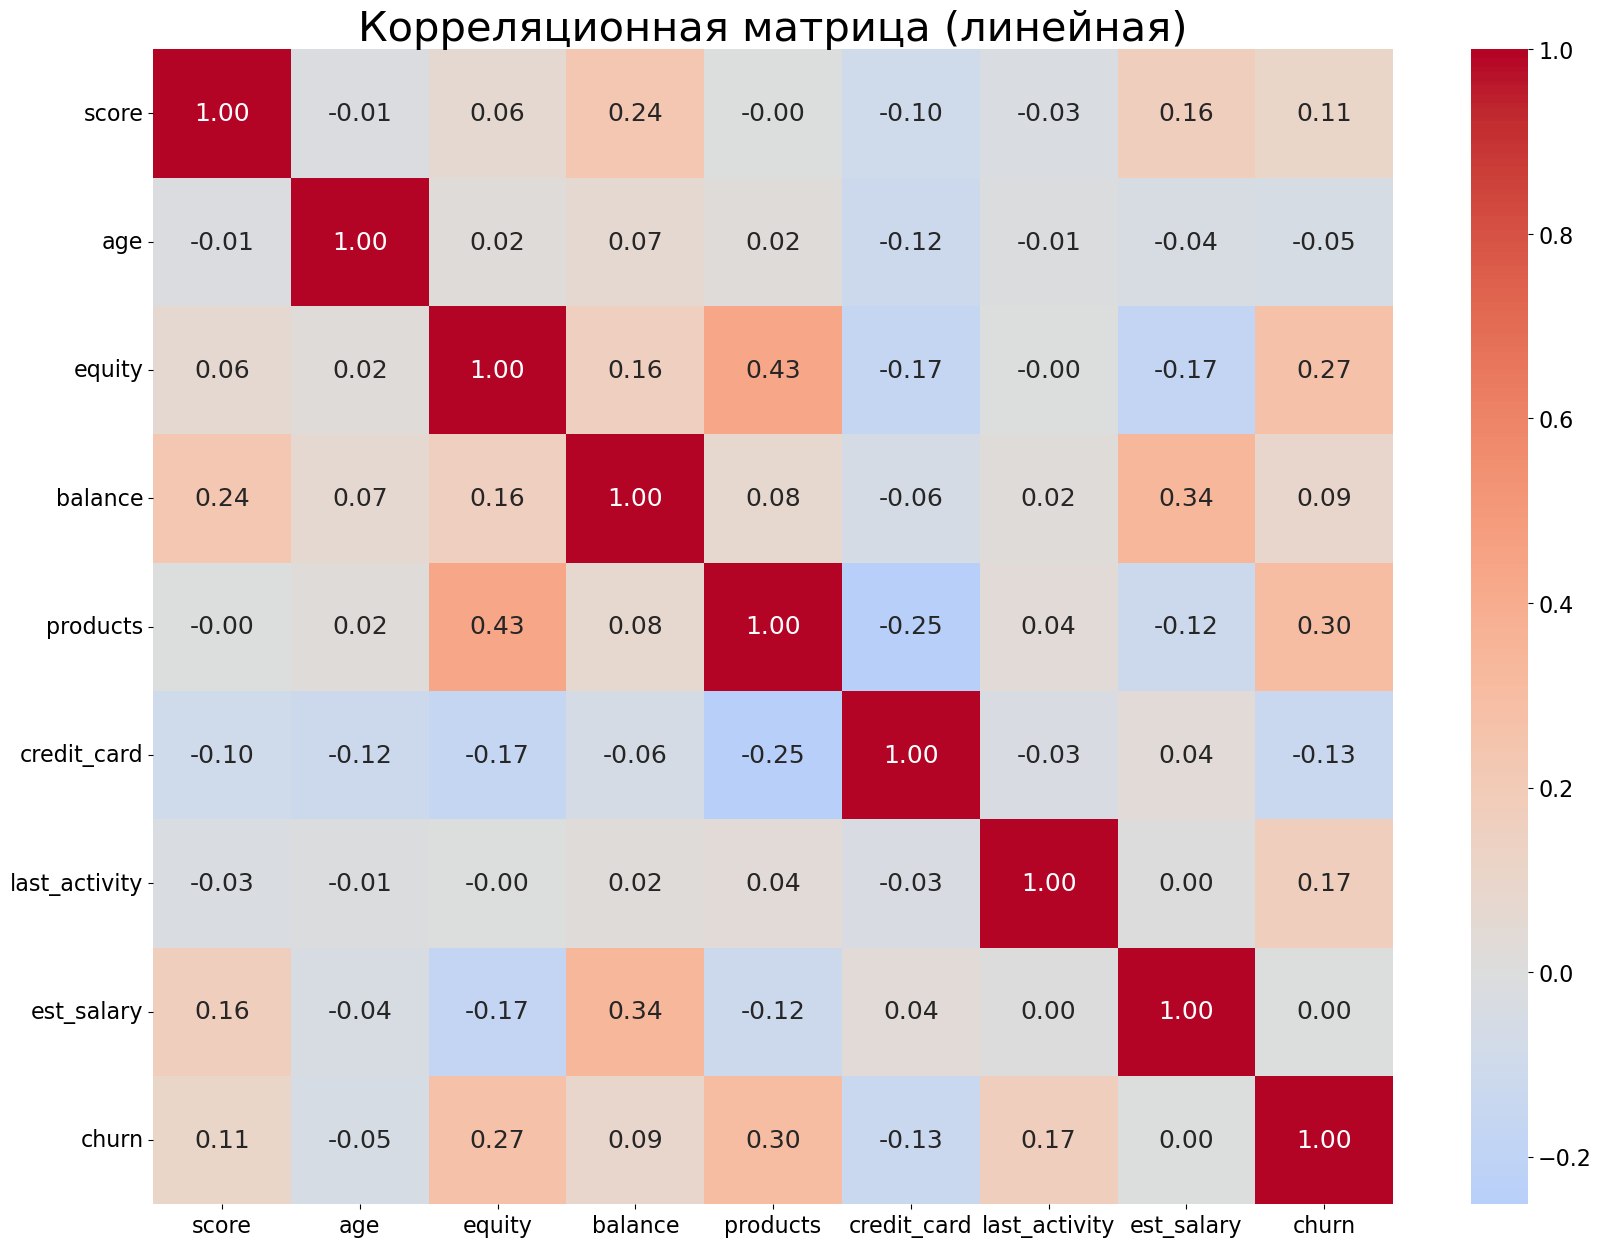

In [35]:
# Выбираем только числовые столбцы для вычисления корреляции
numeric_data = data.select_dtypes(include=[np.number])

# Рассчитываем корреляционную матрицу
selected_correlation_matrix = numeric_data.corr()

# Строим тепловую карту
sns.heatmap(selected_correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0)
plt.title('Корреляционная матрица (линейная)')
plt.show()

Была — c натяжкой — замечена умеренная сила взаимосвязи (|0.3-0.5| по Чеддоку) между признаком оттока `churn` и `products` (0.3) и между переменными `equity` и `products` (0.43), что можно интерпретировать так: чем больше у клиента объектов собственности, тем больше у него продуктов.

Умеренная сила взаимосвязи наблюдается между переменными `balance` и `est_salary` (0.34), что можно интерпретировать так: чем больше у клиента оценочный доход, тем больше денег на счёте.

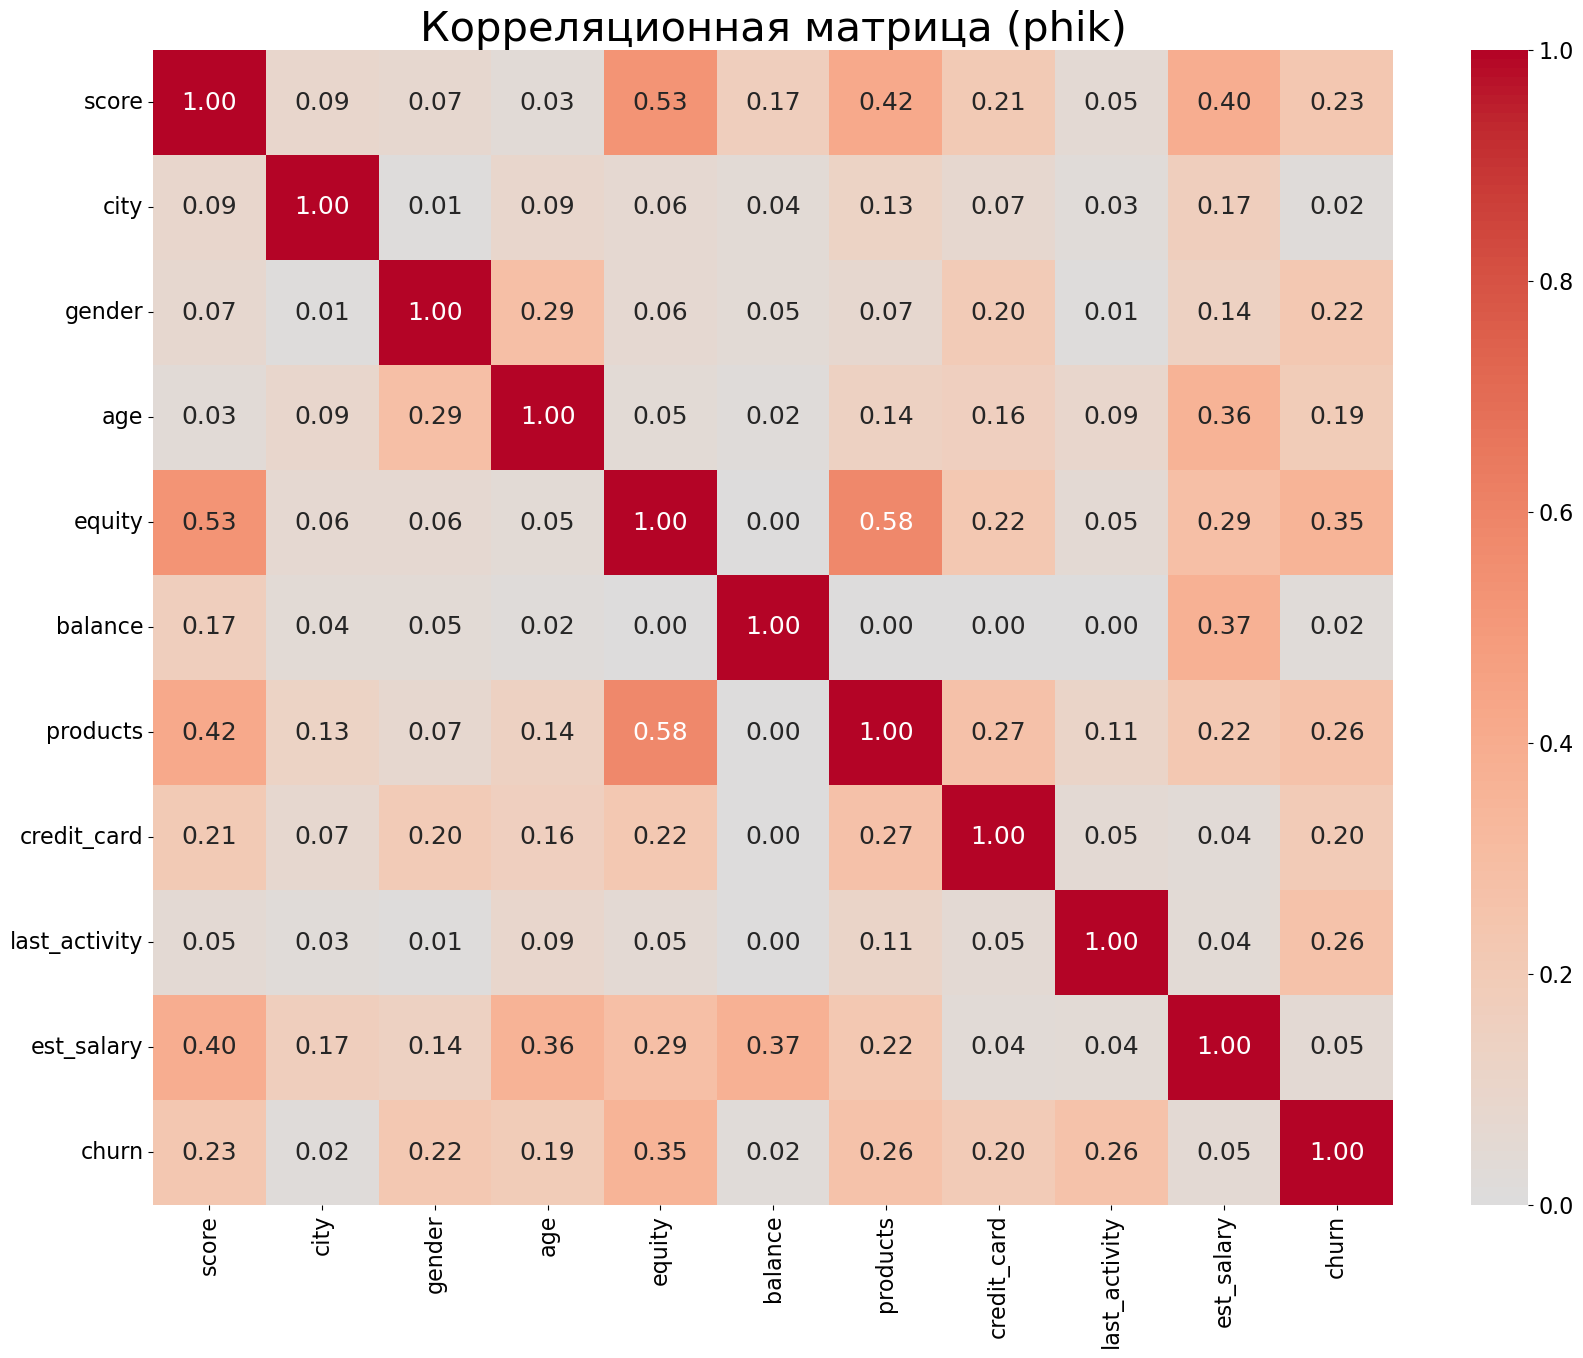

In [36]:
# Расcчитаем корреляции с использованием phik

correlation_matrix = data.phik_matrix(interval_cols=['score',
                                                     'age',
                                                     'balance',
                                                     'est_salary'])

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0)

plt.title('Корреляционная матрица (phik)');

Умеренная сила взаимосвязи (|0.3-0.5| по Чеддоку) замечена между признаком оттока `churn` и `equity` (0.35).

Для остальных переменных заметная сила взаимосвязи (|0.5-0.7| по Чеддоку) обнуружена между переменными `equity` и `products` (0.58), а также между переменными `equity` и `score` (0.53). Также есть несколько примеров умеренной силы взаимосвязи (|0.3-0.5| по Чеддоку) между переменными, но этого недостаточно для формулирования выводов.

Границей наличия/отсутствия взаимного влияния между переменными давайте считать |0.5|. Таким образом, в данных обнаружена только одна существенная взаимозависимость — между `equity` и `products` (0.58).

**Промежуточные выводы**

Заметно, что корреляция Пирсона даёт меньшие оценки взаимосвязи между переменным, что свидетельствует о наличии нелинейного характера взаимосвязей.

Границей наличия/отсутствия взаимного влияния между переменными давайте считать |0.5|. Таким образом, в данных обнаружена только одна существенная взаимозависимость — между `equity` и `products` (0.58).

#### Выводы по исследовательскому анализу данных

**Анализ распределения признаков** по отдельности выявил 10 сегментов клиентов, которые склонны к уходу из банка.

Таким образом, можно описать типичного отточного клиента:
- мужчина;
- возраст — от 25 до 35 лет и от 50 до 60 лет;
- живёт в Ярославле или Ростове;
- балл кредитного скоринга — от 821 до 940;
- баланс на счёте от 750 тыс. ₽; 
- оценка дохода:
    - от 80 до 90 тыс. ₽,
    - от 100 до 140 тыс. ₽,
    - от 150 до 220 тыс. ₽,
    - от 250 до 270 тыс. ₽,
    - от 290 до 330 тыс. ₽.
- имеет от 3 до 9 объектов собственности;
- имеет от 3 до 5 банковских продуктов;
- не имеет кредитной карты;
- активно пользуется банком.

**Анализ портрета клиента** выделил центральные тенденции для отточного клиента:
- мужчина;
- средний возраст ниже на 2 года и составляет 41 год;
- средний балл кредитного скоринга выше на 2% и составляет 863 балла;
- медианная зарплата выше на 6% и составляет 125 тыс. ₽;
- медианный баланс выше на 65% и составляет 782 тыс. ₽;
- медианное количество собственности на 1 больше и составляет 4 объекта.

**Корреляционный анализ** показал следующее:

В данных обнаружена только одна существенная взаимозависимость — между `equity` и `products` (0.58).

### Проверка гипотез

#### Гипотеза о различии оценочных доходов между группами ушедших и оставшихся клиентов

$\begin{equation*}
   H_0:\text{Нет статистически значимого различия в доходах между клиентами, которые ушли, и клиентами, которые остались.}
\end{equation*}$

$\begin{equation*}
   H_1:\text{Существует статистически значимое различие в доходах между клиентами, которые ушли, и клиентами, которые остались.}
\end{equation*}$

Перед проверкой гипотезы удостоверимся в том, что соблюдены условия проведения теста Стьюдента.

In [37]:
# Выведем описательную статистику по оценочному доходу

data.groupby('churn')['est_salary'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,8155.0,147674.637881,142684.405027,2546.30,73445.555,118227.60,173960.9250,1395064.45
1,1818.0,148357.483157,122931.981872,10880.27,83285.660,125408.88,176017.8375,1263028.49


- Для клиентов, которые остались (`churn` = 0), средний доход составляет примерно 147,783 единиц, со стандартным отклонением в 142,802 единицы.
- Для клиентов, которые ушли (`churn` = 1), средний доход составляет примерно 148,243 единиц, со стандартным отклонением в 122,914 единицы.

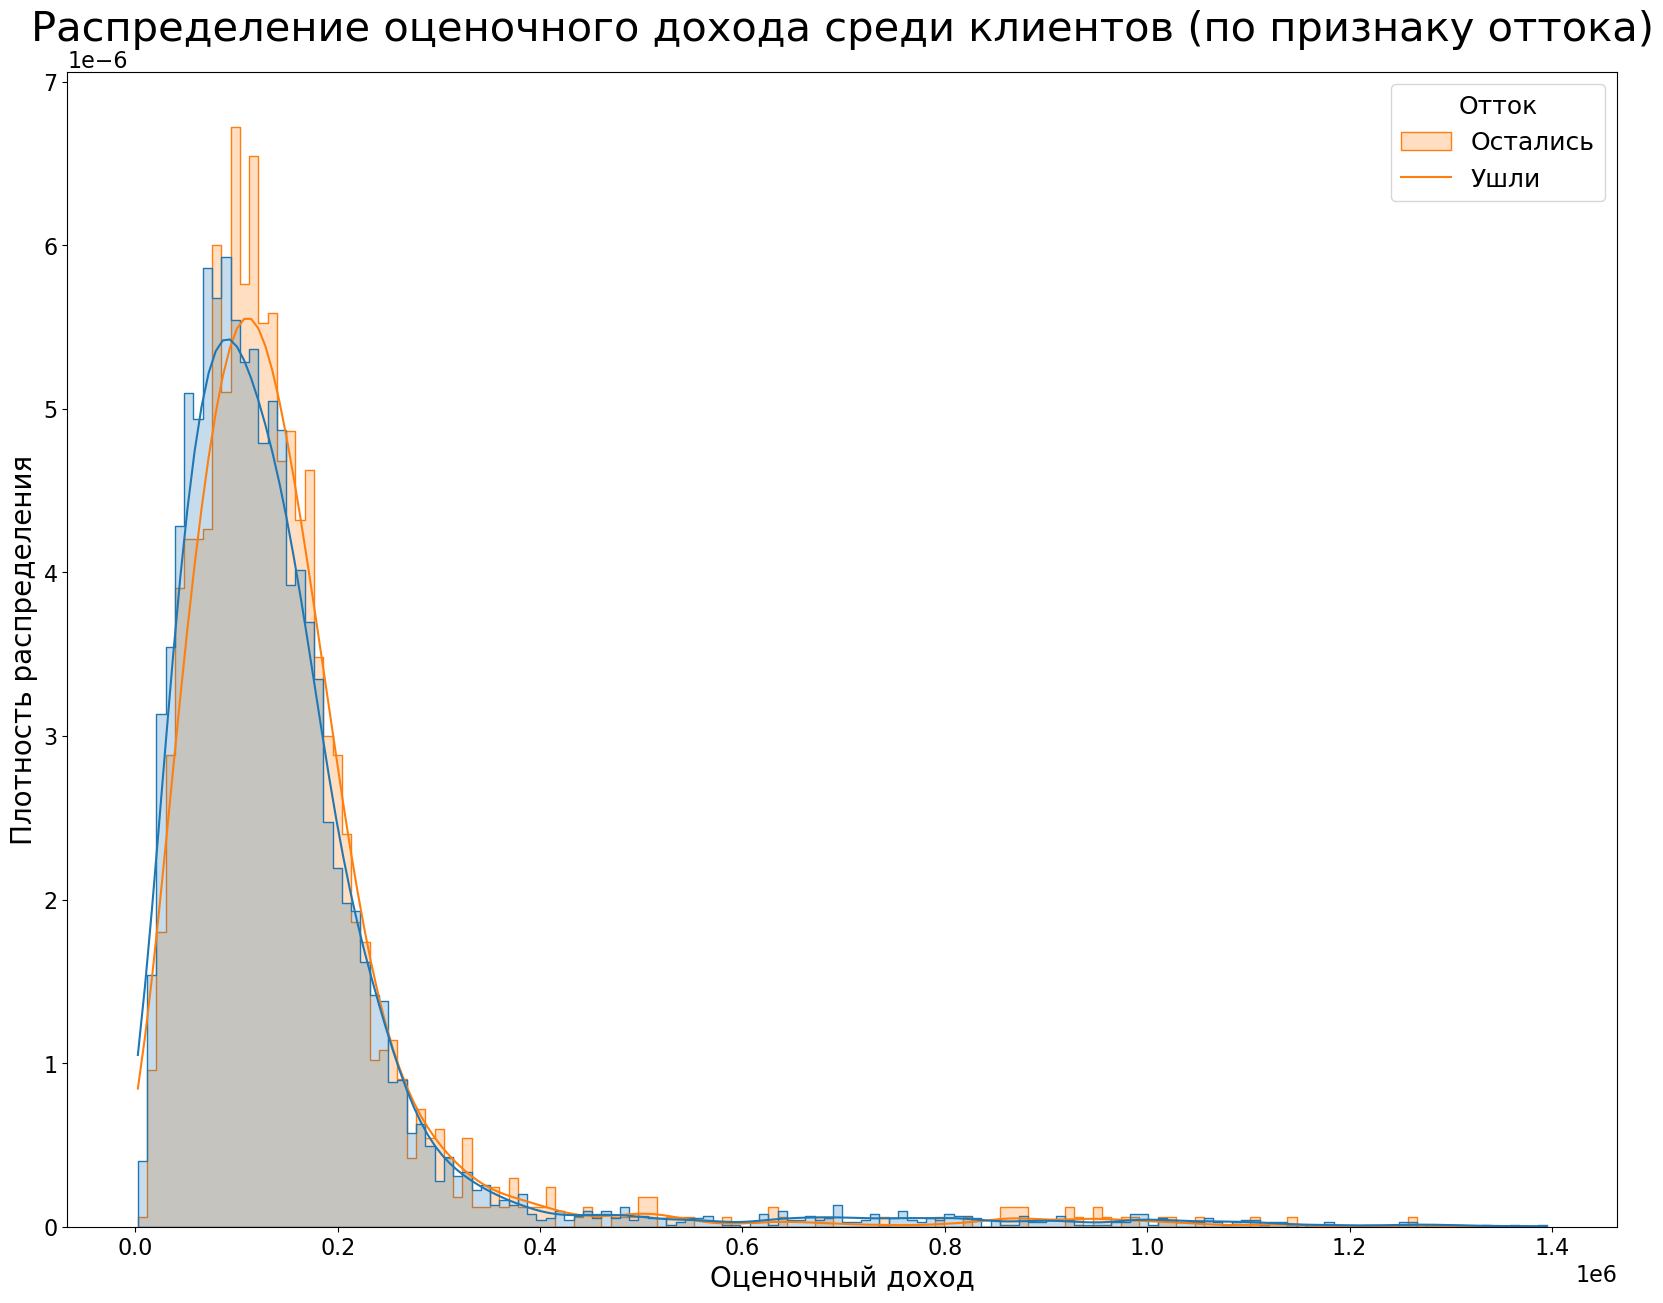

In [38]:
# Создадим график распределения доходов для двух групп

sns.histplot(data,
             x='est_salary',
             hue='churn',
             element='step',
             stat='density',
             common_norm=False,
             kde=True)
plt.title('Распределение оценочного дохода среди клиентов (по признаку оттока)')
plt.xlabel('Оценочный доход')
plt.ylabel('Плотность распределения')
plt.legend(title='Отток', labels=['Остались', 'Ушли']);

- Распределения доходов для обеих групп выглядят достаточно симметричными, но не идеально нормальными.
- Имеется значительное перекрытие между распределениями двух групп.

---

Проведём тест Шапиро-Уилка на нормальность распределения. Из-за ограничений теста Шапиро-Уилка на большие выборки, будем использовать случайную подвыборку

In [39]:
print(stats.shapiro(data[data['churn'] == 0]['est_salary'].sample(500, random_state=1)))
stats.shapiro(data[data['churn'] == 1]['est_salary'].sample(500, random_state=1))

ShapiroResult(statistic=0.6347227630230328, pvalue=3.0882078417252455e-31)


ShapiroResult(statistic=0.6456151278766474, pvalue=7.190722298062359e-31)

- Для клиентов, которые остались (`churn` = 0): p-значение ≈ 6.57e-32, что намного меньше 0.05, указывая на то, что распределение не является нормальным.
- Для клиентов, которые ушли (`churn` = 1): p-значение ≈ 8.26e-27, что также значительно меньше 0.05, указывая на ненормальность распределения.

---

Проведём тест Левена на равенство дисперсий.

In [40]:
stats.levene(data[data['churn'] == 0]['est_salary'],
             data[data['churn'] == 1]['est_salary'])

LeveneResult(statistic=6.659643229714454, pvalue=0.009876226357398085)

- p-значение ≈ 0.0095, что меньше 0.05, говорит о том, что дисперсии в группах статистически значимо различаются.

Эти результаты показывают, что распределения доходов в обеих группах не соответствуют нормальному распределению, и дисперсии в группах различаются. Следовательно, использование стандартного t-теста Стьюдента для сравнения средних не является корректным подходом.

Вместо этого, мы можем использовать непараметрические методы, такие как тест Манна-Уитни, который не требует предположения о нормальности распределений и равенстве дисперсий.

In [41]:
stats.mannwhitneyu(data[data['churn'] == 0]['est_salary'],
                   data[data['churn'] == 1]['est_salary'])

MannwhitneyuResult(statistic=6995242.0, pvalue=0.00016830729188229058)

Результаты теста Манна-Уитни показывают следующее:

- p-значение ≈ 0.00024, что значительно меньше порогового уровня значимости 0.05.

Это говорит о том, что есть статистически значимые различия в медианных значениях доходов между группами клиентов, которые остались, и теми, которые ушли.

Следовательно, альтернативная гипотеза о том, что доходы клиентов, ушедших и оставшихся, различаются, подтверждается.

#### Гипотеза о влиянии пола клиента и его оценочного дохода на отток

$\begin{equation*}
   H_0:\text{Средний оценочный доход ушедших клиентов одинаков для разных полов.}
\end{equation*}$

$\begin{equation*}
   H_1:\text{Средний оценочный доход ушедших клиентов различается между мужчинами и женщинами.}
\end{equation*}$

In [42]:
# Ограничим выборку теми, кто ушёл из банка

churned_data = data[data['churn'] == 1]

# Разделим выборку на группы по полу

churned_males = churned_data[churned_data['gender'] == 'М']['est_salary']
churned_females = churned_data[churned_data['gender'] == 'Ж']['est_salary']

Сначала проверим выполнение предпосылок для проведения теста Стьюдента.

In [43]:
# Проверим на нормальность распределения доходов в каждой группе

print(stats.shapiro(churned_males.sample(500, random_state=1)))
print(stats.shapiro(churned_females.sample(500, random_state=1)))

# Проверим на равенство дисперсий

stats.levene(churned_males, churned_females)

ShapiroResult(statistic=0.6372283250661865, pvalue=3.744245097593956e-31)
ShapiroResult(statistic=0.6724446677279757, pvalue=6.319102884873757e-30)


LeveneResult(statistic=5.301174845805082, pvalue=0.021423657620587275)

Тест Шапиро-Уилка на нормальность распределения доходов:
- Для мужчин: p-значение ≈ 3.74e-31.
- Для женщин: p-значение ≈ 7.64e-31.

В обоих случаях p-значения значительно меньше 0.05, что указывает на ненормальность распределения доходов в обеих группах.

Тест Левена на равенство дисперсий:
p-значение ≈ 0.0219, что меньше 0.05, говорит о том, что дисперсии в группах статистически значимо различаются.

Учитывая эти результаты, использование стандартного двухвыборочного t-теста для сравнения средних не является подходящим. Вместо этого, мы также будем использовать тест Манна-Уитни для сравнения медианных значений доходов между мужчинами и женщинами среди ушедших клиентов.

In [44]:
stats.mannwhitneyu(churned_males, churned_females)

MannwhitneyuResult(statistic=393504.0, pvalue=0.09343735201722919)

p-значение ≈ 0.0773, что больше уровня значимости 0.05.

Это означает, что мы не можем отвергнуть нулевую гипотезу о том, что средние оценочные доходы ушедших клиентов не различаются между мужчинами и женщинами. Следовательно, на основе имеющихся данных нет достаточных оснований утверждать, что средний оценочный доход ушедших клиентов различается в зависимости от пола.

#### Гипотеза о различии в доле оттока клиентов в зависимости от количества используемых банковских продуктов

$\begin{equation*}
   H_0:\text{Доля оттока клиентов, использующих до 2 продуктов, равна или ниже доли оттока клиентов, использующих 3 и более продуктов.}
\end{equation*}$

$\begin{equation*}
   H_1:\text{Доля оттока клиентов, использующих до 2 продуктов, выше, чем доля оттока клиентов, использующих 3 и более продуктов.}
\end{equation*}$

In [45]:
# Разделим клиентов на две группы

group_2_less_products = data[data['products'] <= 2]
group_3_more_products = data[data['products'] >= 3]

In [46]:
# Подситаем количество ушедших клиентов и общего количества клиентов в каждой группе

churn_2_less_products = group_2_less_products['churn'].sum()
total_2_less_products = group_2_less_products.shape[0]
churn_3_more_products = group_3_more_products['churn'].sum()
total_3_more_products = group_3_more_products.shape[0]

# Расситаем пропорции оттока для каждой группы

proportion_2_less_products = churn_2_less_products / total_2_less_products
proportion_3_more_products = churn_3_more_products / total_3_more_products

print(f"Пропорция оттока для 1-2 продуктов: {proportion_2_less_products}")
print(f"Пропорция оттока для 3+ продуктов: {proportion_3_more_products}")

Пропорция оттока для 1-2 продуктов: 0.14368633025349442
Пропорция оттока для 3+ продуктов: 0.395166557805356


In [47]:
# Подготовим данные для z-теста

count = np.array([churn_2_less_products, churn_3_more_products])
nobs = np.array([total_2_less_products, total_3_more_products])

# Выполним z-тест для сравнения пропорций

stat, pval = proportions_ztest(count, nobs)

print(f"Z-статистика: {stat}")
print(f"p-значение: {pval}")

Z-статистика: -23.44866387572011
p-значение: 1.3640552852316128e-121


Эти результаты подтверждают предыдущие выводы: существует статистически значимое различие в долях оттока между клиентами, использующими от 0 до 2 продуктов, и клиентами, использующими 3 и более продуктов. Это означает, что клиенты, использующие 3 и более продуктов, имеют статистически выше вероятность оттока, чем клиенты, использующие меньшее количество продуктов.

Для того чтобы предпосылки z-теста для сравнения двух пропорций были соблюдены и тест был адекватным, необходимо убедиться в том, что выполнены следующие условия:

1. *Независимость выборок*

Каждая из двух групп должна быть выбрана независимо от другой, и наблюдения внутри каждой группы также должны быть независимы. В контексте данного анализа это предполагается выполненным, так как каждый клиент классифицируется только в одну группу в зависимости от количества используемых им продуктов.

2. *Бинарный исход*

z-тест пропорций применим только к данным, где исходы могут быть классифицированы как успех или неудача (или, в данном контексте, отток или неотток).

3. *Размер выборки*

Каждая группа должна быть достаточно велика, чтобы приблизительные свойства нормального распределения могли применяться к распределению выборочной пропорции. Практическое правило состоит в том, что произведение числа успехов (оттоков) и числа неудач (оставшихся клиентов) в каждой группе должно быть больше 5 (np > 5 и n(1-p) > 5).

In [48]:
# Проверим 3 условие применимости z-теста

expected_successes_2_less = total_2_less_products * proportion_2_less_products
expected_failures_2_less = total_2_less_products * (1 - proportion_2_less_products)
expected_successes_3_more = total_3_more_products * proportion_3_more_products
expected_failures_3_more = total_3_more_products * (1 - proportion_3_more_products)

conditions_met = all([expected_successes_2_less >= 5,
                      expected_failures_2_less >= 5,
                      expected_successes_3_more >= 5,
                      expected_failures_3_more >= 5])

print(f"Предпосылки z-теста соблюдены: {conditions_met}")

Предпосылки z-теста соблюдены: True


#### Выводы по проверке гипотез

Были проверены 3 гипотезы и получены следующие результаты:

1. Гипотеза о различии оценочных доходов между группами ушедших и оставшихся клиентов

**Результат**: есть статистически значимые различия в медианных значениях доходов между группами клиентов, которые остались, и теми, которые ушли.

2. Гипотеза о влиянии пола клиента и его оценочного дохода на отток

**Результат**: нет достаточных оснований утверждать, что средний оценочный доход ушедших клиентов различается в зависимости от пола.

3. Гипотеза о различии в доле оттока клиентов в зависимости от количества используемых банковских продуктов

**Результат**: клиенты, использующие 3 и более продуктов, имеют статистически выше вероятность оттока, чем клиенты, использующие меньшее количество продуктов.

### Сегментация отточных клиентов банка

Выведем на экран показатель среднего оттока по банку.

In [49]:
# Выборка только с отточными клиентами

churned_clients = data.query('churn == 1')

# Выборка только с клиентами, оставшимися с банком

retained_clients = data.query('churn == 0')

# Доля оттока для выборки

churn_rate = churned_clients.shape[0] / (churned_clients.shape[0] + retained_clients.shape[0]) * 100

print('Количество клиентов в выборке:', data.shape[0])
print('Количество отточных клиентов в выборке:', churned_clients.shape[0])
print('Количество оставшихся клиентов в выборке:', retained_clients.shape[0])
print('Доля отточных клиентов в выборке (%):', churn_rate)

Количество клиентов в выборке: 9973
Количество отточных клиентов в выборке: 1818
Количество оставшихся клиентов в выборке: 8155
Доля отточных клиентов в выборке (%): 18.229218891005715


#### Сегментирование на основе предпосылок анализа

На основе выводов по исследовательскому анализу данных (раздел 2.3.4) и выводов по проверке гипотез (раздел 2.4.4) можно выделить следующие сегменты отточных пользователей, на привлечение которых стоит приложить усилия отделу маркетинга банка. Условием сегментацие считаем количество клиентов в сегменте не ниже 500 человек (но и не сильно больше) и учёт не менее 3 признаков (включая признак пола клиента). В целях оптимизации сегментирования некоторые сегменты были укрупнены, например, ожидаемый доход вместо трёх более точных сегментов (от 80 до 90 тыс. ₽, от 100 до 140 тыс. ₽, от 150 до 220 тыс. ₽, заменён одним большим (от 80 до 220 тыс. ₽).

**Сегмент 1: клиенты от 50 до 60 лет с балансом более 750 тыс. ₽**

In [50]:
segment_1 = data.query('50 <= age <= 60 and balance > 750000')

# Сегмент 1 только с отточными клиентами

churned_clients_1 = segment_1.query('churn == 1')

# Сегмент 1 только с клиентами, оставшимися с банком

retained_clients_1 = segment_1.query('churn == 0')

# Доля оттока для Сегмента 1

churn_rate_1 = churned_clients_1.shape[0] / (churned_clients_1.shape[0] + retained_clients_1.shape[0]) * 100

print('Количество клиентов в сегменте:', segment_1.shape[0])
print('Количество отточных клиентов в сегменте:', churned_clients_1.shape[0])
print('Количество оставшихся клиентов в сегменте:', retained_clients_1.shape[0])
print('Доля отточных клиентов в сегменте (%):', churn_rate_1)

Количество клиентов в сегменте: 615
Количество отточных клиентов в сегменте: 274
Количество оставшихся клиентов в сегменте: 341
Доля отточных клиентов в сегменте (%): 44.552845528455286


**Сегмент 2: клиенты от 25 до 37 лет c кредитным скором от 821 до 940 баллов и доходом от 80 до 220 тыс. ₽, активно пользующиеся банком**

In [51]:
segment_2 = data.query('25 <= age <= 37 and 821 <= score <= 940 and 80000 <= est_salary <= 220000 and last_activity == 1')

# Сегмент 2 только с отточными клиентами

churned_clients_2 = segment_2.query('churn == 1')

# Сегмент 2 только с клиентами, оставшимися с банком

retained_clients_2 = segment_2.query('churn == 0')

# Доля оттока для Сегмента 2

churn_rate_2 = churned_clients_2.shape[0] / (churned_clients_2.shape[0] + retained_clients_2.shape[0]) * 100

print('Количество клиентов в сегменте:', segment_2.shape[0])
print('Количество отточных клиентов в сегменте:', churned_clients_2.shape[0])
print('Количество оставшихся клиентов в сегменте:', retained_clients_2.shape[0])
print('Доля отточных клиентов в сегменте (%):', churn_rate_2)

Количество клиентов в сегменте: 789
Количество отточных клиентов в сегменте: 366
Количество оставшихся клиентов в сегменте: 423
Доля отточных клиентов в сегменте (%): 46.38783269961977


**Сегмент 3: мужчины с количеством собственности 3 и более объектов, не пользующиеся кредитной картой**

In [52]:
segment_3 = data.query('gender == "М" and equity > 2 and credit_card == 0')

# Сегмент 3 только с отточными клиентами

churned_clients_3 = segment_3.query('churn == 1')

# Сегмент 3 только с клиентами, оставшимися с банком

retained_clients_3 = segment_3.query('churn == 0')

# Доля оттока для Сегмента 3

churn_rate_3 = churned_clients_3.shape[0] / (churned_clients_3.shape[0] + retained_clients_3.shape[0]) * 100

print('Количество клиентов в сегменте:', segment_3.shape[0])
print('Количество отточных клиентов в сегменте:', churned_clients_3.shape[0])
print('Количество оставшихся клиентов в сегменте:', retained_clients_3.shape[0])
print('Доля отточных клиентов в сегменте (%):', churn_rate_3)

Количество клиентов в сегменте: 891
Количество отточных клиентов в сегменте: 419
Количество оставшихся клиентов в сегменте: 472
Доля отточных клиентов в сегменте (%): 47.02581369248036


**Сегмент 4: мужчины из Ярославля или Ростова, у которых 3 и более банковских продуктов**

In [53]:
segment_4 = data.query('gender == "М" and (city == "Ярославль" or city == "Ростов") and products > 2')

# Сегмент 4 только с отточными клиентами

churned_clients_4 = segment_4.query('churn == 1')

# Сегмент 4 только с клиентами, оставшимися с банком

retained_clients_4 = segment_4.query('churn == 0')

# Доля оттока для Сегмента 4

churn_rate_4 = churned_clients_4.shape[0] / (churned_clients_4.shape[0] + retained_clients_4.shape[0]) * 100

print('Количество клиентов в сегменте:', segment_4.shape[0])
print('Количество отточных клиентов в сегменте:', churned_clients_4.shape[0])
print('Количество оставшихся клиентов в сегменте:', retained_clients_4.shape[0])
print('Доля отточных клиентов в сегменте (%):', churn_rate_4)

Количество клиентов в сегменте: 602
Количество отточных клиентов в сегменте: 304
Количество оставшихся клиентов в сегменте: 298
Доля отточных клиентов в сегменте (%): 50.498338870431894


#### Приоритизация сегментов и рекомендации

Мы выделили 4 сегмента, на которые команде маркетинга банка нужно обратить внимание.

Поскольку количество клиентов в сегментах разнится, а доля отточных клиентов в них сопоставима (от 44,5 до 50,5 %), приоритизация должна быть выстроена по другому признаку.

В первую очередь, нужно заняться сегментом пожилых и богатых клиентов (Сегмент 1), потому что такие клиенты могут принести больше выгоды банку засчёт управления своими денежными потоками с помощью банковских продуктов.

**Рекомендация для Сегмента 1**
- Забота о наследстве: можно предложить услуги по планированию наследства, включая юридическую поддержку и налоговое консультирование.

Во вторую очередь, нужно заняться сегментом молодых клиентов с хорошей кредитной историей и высокими доходами (Сегмент 2), потому что такие клиенты активно распоряжаются своими денежными потоками. Их отток является признаком того, что с банковскими продуктами что-то не так, и через них необходимо активно собирать обратную связь.

**Рекомендация для Сегмента 2**
- Предложения по кредитным картам и льготным кредитам: учитывая хорошую кредитную историю, можно предложить кредитные карты с бонусными программами или льготные условия по потребительским кредитам.

В третью очередь, нужно заняться сегментом ярославских и ростовских мужчин с большим количеством банковских продуктов (Сегмент 4), потому что они в большой степени связаны с банком и их уход говорит о том, что им легче уйти из банка, с которым они сильно связаны, чем продолжать сотрудничество.


**Рекомендация для Сегмента 4**
- Премиальное обслуживание: можно предложить услуги премиум-класса или VIP-обслуживание, чтобы подчеркнуть их статус важных клиентов.
- Эксклюзивные мероприятия и предложения: можно организовать эксклюзивные мероприятия, чтобы укрепить их лояльность и дать им чувство принадлежности к привилегированному сообществу.

В четвёртую очередь, нужно заняться мужчинами без кредитной карты, но с количеством собственности в 3 и более объектов. Из всех выделенных сегментов это наименее активнные пользователи банка, поэтому их уход меньше остальных скажется на показателях эффективности банка. Тем не менее, с этим сегментам необходимо работать с точки зрения вовлечения в банковские продукты, использование заёмных денег.

**Рекомендация для Сегмента 3**
- Страхование имущества: можно предложить комплексные страховые продукты для защиты их собственности.

### Результат исследования

В процессе исследования были получены следующие результаты:
1. Загрузка данных и их описание
- В исходных данных 10000 наблюдений и 12 переменных.
- Были замечены пропуски данных в переменных в `age` и `balance`. Были замечены дубликаты данных в переменной `user_id`.
- Данные соответствуют описанию: 3 города, два пола, количество единиц собственности от 0 до 9 без пропусков, количество банковских продуктов от 0 до 5 без пропусков (отсутствие продуктов может быть аномалий, это нужно проверить), индикатор наличия кредитной карты, индикатор последней активности клиента, индикатор оттока клиента.
- Типичный клиент банка — это мужчина из Ярославля 42 лет. У него 848 баллов кредитного скоринга, есть 2 банковских продукта, в т. ч. кредитная карта. У него нет собственности, на счету он хранит 524272 ₽, а зарабатывает 119658 ₽.

2. Подготовка данных к исследованию
- Пропуски значений в переменных `age` и `balance` имеют неслучайный характер (MNAR) и не могут быть удалены. Однако пропусков в переменной `age` настолько мало, что мы можем их удалить.
- Дубликаты в переменной `user_id`, скорее всего, являются следствием технической ошибки, не мешают анализу и должны быть оставлены в данных без изменений. Сама переменная впоследствии была удалена из-за бесполезности для исследования.

3. Исследовательский анализ данных

- Анализ распределения признаков по отдельности выявил 10 сегментов клиентов, которые склонны к уходу из банка.
    
    Таким образом, можно описать типичного отточного клиента:
    - мужчина;
    - возраст — от 25 до 35 лет и от 50 до 60 лет;
    - живёт в Ярославле или Ростове;
    - балл кредитного скоринга — от 821 до 940;
    - баланс на счёте от 750 тыс. ₽; 
    - оценка дохода:
        - от 80 до 90 тыс. ₽,
        - от 100 до 140 тыс. ₽,
        - от 150 до 220 тыс. ₽,
        - от 250 до 270 тыс. ₽,
        - от 290 до 330 тыс. ₽.
    - имеет от 3 до 9 объектов собственности;
    - имеет от 3 до 5 банковских продуктов;
    - не имеет кредитной карты;
    - активно пользуется банком.


- Анализ портрета клиента выделил центральные тенденции для отточного клиента:
    - мужчина;
    - средний возраст ниже на 2 года и составляет 41 год;
    - средний балл кредитного скоринга выше на 2% и составляет 863 балла;
    - медианная зарплата выше на 6% и составляет 125 тыс. ₽;
    - медианный баланс выше на 65% и составляет 782 тыс. ₽;
    - медианное количество собственности на 1 больше и составляет 4 объекта.


- Корреляционный анализ показал следующее:

    В данных обнаружена только одна существенная взаимозависимость — между `equity` и `products` (0.58).
    
4. Проверка гипотез

    Были проверены 3 гипотезы и получены следующие результаты:

    - Гипотеза о различии оценочных доходов между группами ушедших и оставшихся клиентов;
 
     Результат: есть статистически значимые различия в медианных значениях доходов между группами клиентов, которые остались, и теми, которые ушли

    - Гипотеза о влиянии пола клиента и его оценочного дохода на отток;
    
     Результат: нет достаточных оснований утверждать, что средний оценочный доход ушедших клиентов различается в зависимости от пола

    - Гипотеза о различии в доле оттока клиентов в зависимости от количества используемых банковских продуктов.

     Результат: клиенты, использующие 3 и более продуктов, имеют статистически выше вероятность оттока, чем клиенты, использующие меньшее количество продуктов
     
5. Сегментация отточных клиентов банка
    
    Мы выделили и приоритизировали 4 сегмента, на которые команде маркетинга банка нужно обратить внимание.

    **Рекомендация для Сегмента 1**
        - Забота о наследстве: можно предложить услуги по планированию наследства, включая юридическую поддержку и налоговое консультирование.
    
    **Рекомендация для Сегмента 2**
        - Предложения по кредитным картам и льготным кредитам: учитывая хорошую кредитную историю, можно предложить кредитные карты с бонусными программами или льготные условия по потребительским кредитам.

    **Рекомендация для Сегмента 4**
    
        - Премиальное обслуживание: можно предложить услуги премиум-класса или VIP-обслуживание, чтобы подчеркнуть их статус важных клиентов.
        - Эксклюзивные мероприятия и предложения: можно организовать эксклюзивные мероприятия, чтобы укрепить их лояльность и дать им чувство принадлежности к привилегированному сообществу.

    **Рекомендация для Сегмента 3**
        - Страхование имущества: можно предложить комплексные страховые продукты для защиты их собственности.